In [239]:
%pip install numpy
%pip install pandas
%pip install matplotlib.pylab
%pip install seaborn
%pip install statsmodels
%pip install scikit-learn
%pip install xgboost

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement matplotlib.pylab (from versions: none)
ERROR: No matching distribution found for matplotlib.pylab


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import datetime


%matplotlib inline
sns.set(rc={'figure.figsize':(20,10)})

In [241]:
import sklearn.linear_model
import sklearn.metrics


In [242]:
import sklearn.model_selection
import sklearn.ensemble

In [3]:
df = pd.read_pickle('df.pickle')

In [244]:
df[df['week_id']==11609]

,date,week_id,event_name_1,event_type_1,event_name_2,event_type_2,snap,item_id,dept_id,cat_id,sales,price,yearcw
5646748,2016-03-26,11609,NaN,NaN,NaN,NaN,0,HOBBIES_1_001,HOBBIES_1,HOBBIES,NaN,8.26,201612
5646749,2016-03-26,11609,NaN,NaN,NaN,NaN,0,HOBBIES_1_002,HOBBIES_1,HOBBIES,NaN,3.97,201612
5646750,2016-03-26,11609,NaN,NaN,NaN,NaN,0,HOBBIES_1_003,HOBBIES_1,HOBBIES,NaN,2.97,201612
5646751,2016-03-26,11609,NaN,NaN,NaN,NaN,0,HOBBIES_1_004,HOBBIES_1,HOBBIES,NaN,4.64,201612
5646752,2016-03-26,11609,NaN,NaN,NaN,NaN,0,HOBBIES_1_005,HOBBIES_1,HOBBIES,NaN,2.88,201612
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5665037,2016-03-31,11609,NaN,NaN,NaN,NaN,0,FOODS_3_823,FOODS_3,FOODS,NaN,2.88,201613
5665038,2016-03-31,11609,NaN,NaN,NaN,NaN,0,FOODS_3_824,FOODS_3,FOODS,NaN,2.48,201613
5665039,2016-03-31,11609,NaN,NaN,NaN,NaN,0,FOODS_3_825,FOODS_3,FOODS,NaN,3.98,201613
5665040,2016-03-31,11609,NaN,NaN,NaN,NaN,0,FOODS_3_826,FOODS_3,FOODS,NaN,1.28,201613


1 DF Prognose der Sales je Kategorie mit Durchschnittlichem Preis, Kategorie Wochentag und Event_type, Snap
1 DF Wochentag und Monat 
1 DF Durchschnittlicher Preis, Kategorie Wochentag und Event_type, Snap

### Creation of DataFrames

In [245]:
#df['date'].dt.strftime('%W')
#df['yearcw'] = df['date'].dt.day.astype('str') + df['date'].dt.strftime('%W')
df['dayofweek'] = df['date'].dt.dayofweek.astype('category')
df['month'] = df['date'].dt.month.astype('category')
df['weekofyear'] = df['date'].dt.weekofyear.astype('category')
df['dayofmonth'] = df['date'].dt.day.astype('category')
df

C:\Users\Dave\AppData\Local\Temp\ipykernel_4232\2484330580.py:5: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df['weekofyear'] = df['date'].dt.weekofyear.astype('category')


,date,week_id,event_name_1,event_type_1,event_name_2,event_type_2,snap,item_id,dept_id,cat_id,sales,price,yearcw,dayofweek,month,weekofyear,dayofmonth
0,2011-03-01,11105,NaN,NaN,NaN,NaN,1,HOBBIES_1_001,HOBBIES_1,HOBBIES,0.0,NaN,201109,1,3,9,1
1,2011-03-01,11105,NaN,NaN,NaN,NaN,1,HOBBIES_1_002,HOBBIES_1,HOBBIES,0.0,NaN,201109,1,3,9,1
2,2011-03-01,11105,NaN,NaN,NaN,NaN,1,HOBBIES_1_003,HOBBIES_1,HOBBIES,0.0,NaN,201109,1,3,9,1
3,2011-03-01,11105,NaN,NaN,NaN,NaN,1,HOBBIES_1_004,HOBBIES_1,HOBBIES,0.0,NaN,201109,1,3,9,1
4,2011-03-01,11105,NaN,NaN,NaN,NaN,1,HOBBIES_1_005,HOBBIES_1,HOBBIES,0.0,NaN,201109,1,3,9,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5665037,2016-03-31,11609,NaN,NaN,NaN,NaN,0,FOODS_3_823,FOODS_3,FOODS,NaN,2.88,201613,3,3,13,31
5665038,2016-03-31,11609,NaN,NaN,NaN,NaN,0,FOODS_3_824,FOODS_3,FOODS,NaN,2.48,201613,3,3,13,31
5665039,2016-03-31,11609,NaN,NaN,NaN,NaN,0,FOODS_3_825,FOODS_3,FOODS,NaN,3.98,201613,3,3,13,31
5665040,2016-03-31,11609,NaN,NaN,NaN,NaN,0,FOODS_3_826,FOODS_3,FOODS,NaN,1.28,201613,3,3,13,31


In [246]:
df.dtypes

date            datetime64[ns]
week_id                  int64
event_name_1            object
event_type_1            object
event_name_2            object
event_type_2            object
snap                     int64
item_id                 object
dept_id                 object
cat_id                  object
sales                  float64
price                  float64
yearcw                  object
dayofweek             category
month                 category
weekofyear            category
dayofmonth            category
dtype: object

In [247]:
df[['dayofweek','month','weekofyear','dayofmonth','yearcw']] = df[['dayofweek','month','weekofyear','dayofmonth','yearcw']].astype('int')

In [248]:
df['snap'] = df['snap'].astype(bool)

In [249]:
df.set_index('date', inplace = True)

In [250]:
df.sort_index(axis = 0, ascending = True, inplace = True)

In [251]:
df

,week_id,event_name_1,event_type_1,event_name_2,event_type_2,snap,item_id,dept_id,cat_id,sales,price,yearcw,dayofweek,month,weekofyear,dayofmonth
date,,,,,,,,,,,,,,,,
2011-03-01,11105,NaN,NaN,NaN,NaN,True,HOBBIES_1_001,HOBBIES_1,HOBBIES,0.0,NaN,201109,1,3,9,1
2011-03-01,11105,NaN,NaN,NaN,NaN,True,HOBBIES_1_002,HOBBIES_1,HOBBIES,0.0,NaN,201109,1,3,9,1
2011-03-01,11105,NaN,NaN,NaN,NaN,True,HOBBIES_1_003,HOBBIES_1,HOBBIES,0.0,NaN,201109,1,3,9,1
2011-03-01,11105,NaN,NaN,NaN,NaN,True,HOBBIES_1_004,HOBBIES_1,HOBBIES,0.0,NaN,201109,1,3,9,1
2011-03-01,11105,NaN,NaN,NaN,NaN,True,HOBBIES_1_005,HOBBIES_1,HOBBIES,0.0,NaN,201109,1,3,9,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-03-31,11609,NaN,NaN,NaN,NaN,False,FOODS_3_823,FOODS_3,FOODS,NaN,2.88,201613,3,3,13,31
2016-03-31,11609,NaN,NaN,NaN,NaN,False,FOODS_3_824,FOODS_3,FOODS,NaN,2.48,201613,3,3,13,31
2016-03-31,11609,NaN,NaN,NaN,NaN,False,FOODS_3_825,FOODS_3,FOODS,NaN,3.98,201613,3,3,13,31


### Creation Data Frame Simple 

In [252]:
df_simple = df[['dayofweek','month','sales']].groupby(by=df.index).agg({'sales':'sum','dayofweek':'mean','month':'mean'})
df_simple[['dayofweek','month']] = df_simple[['dayofweek','month']].astype('category')

In [253]:
df_simple_past = df_simple[df_simple.index<'2016-03-01']
df_simple_future = df_simple[df_simple.index>='2016-03-01']
df_simple_future.drop(columns='sales',inplace=True)
X_simple = df_simple_past.drop(columns='sales')
y_simple = df_simple_past['sales']


C:\Users\Dave\AppData\Local\Temp\ipykernel_4232\1969392478.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_simple_future.drop(columns='sales',inplace=True)


### Creation Data Frame Medium
1 DF Durchschnittlicher Preis, Kategorie Wochentag und Event_type, Snap

In [254]:
df.event_type_1 = pd.Categorical(df.event_type_1)

In [255]:
df.dtypes

week_id            int64
event_name_1      object
event_type_1    category
event_name_2      object
event_type_2      object
snap                bool
item_id           object
dept_id           object
cat_id            object
sales            float64
price            float64
yearcw             int32
dayofweek          int32
month              int32
weekofyear         int32
dayofmonth         int32
dtype: object

In [256]:
df['event_code'] = df.event_type_1.cat.codes

In [257]:
df['event_type_1'].unique()

[NaN, 'Religious', 'Cultural', 'National', 'Sporting']
Categories (4, object): ['Cultural', 'National', 'Religious', 'Sporting']

In [258]:
df['event_code'].unique()

array([-1,  2,  0,  1,  3], dtype=int8)

In [259]:
df[df['event_type_1']=='Religious']

,week_id,event_name_1,event_type_1,event_name_2,event_type_2,snap,item_id,dept_id,cat_id,sales,price,yearcw,dayofweek,month,weekofyear,dayofmonth,event_code
date,,,,,,,,,,,,,,,,,
2011-03-09,11106,LentStart,Religious,NaN,NaN,True,HOBBIES_1_001,HOBBIES_1,HOBBIES,0.0,NaN,201110,2,3,10,9,2
2011-03-09,11106,LentStart,Religious,NaN,NaN,True,HOBBIES_1_002,HOBBIES_1,HOBBIES,0.0,NaN,201110,2,3,10,9,2
2011-03-09,11106,LentStart,Religious,NaN,NaN,True,HOBBIES_1_003,HOBBIES_1,HOBBIES,0.0,NaN,201110,2,3,10,9,2
2011-03-09,11106,LentStart,Religious,NaN,NaN,True,HOBBIES_1_004,HOBBIES_1,HOBBIES,0.0,4.34,201110,2,3,10,9,2
2011-03-09,11106,LentStart,Religious,NaN,NaN,True,HOBBIES_1_005,HOBBIES_1,HOBBIES,0.0,NaN,201110,2,3,10,9,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-03-24,11608,Purim End,Religious,NaN,NaN,False,FOODS_3_823,FOODS_3,FOODS,NaN,2.88,201612,3,3,12,24,2
2016-03-24,11608,Purim End,Religious,NaN,NaN,False,FOODS_3_824,FOODS_3,FOODS,NaN,2.68,201612,3,3,12,24,2
2016-03-24,11608,Purim End,Religious,NaN,NaN,False,FOODS_3_825,FOODS_3,FOODS,NaN,3.98,201612,3,3,12,24,2


NaN = -1 ; Religious = 2 ; Cultural = 0 ; National = 1 ; Sporting = 3 

In [260]:
df.dtypes

week_id            int64
event_name_1      object
event_type_1    category
event_name_2      object
event_type_2      object
snap                bool
item_id           object
dept_id           object
cat_id            object
sales            float64
price            float64
yearcw             int32
dayofweek          int32
month              int32
weekofyear         int32
dayofmonth         int32
event_code          int8
dtype: object

In [261]:
df[['event_code']] = df[['event_code']].astype('int')

In [262]:
df_medium = df[['dayofweek','month','sales','price','event_code','snap']].groupby(by=df.index).agg({'sales':'sum','dayofweek':'mean','month':'mean', 'price':'mean','event_code':'mean','snap':'mean'})
df_medium[['dayofweek','month','event_code','snap']] = df_medium[['dayofweek','month','event_code','snap']].astype('category')

In [263]:
df_medium_past = df_medium[df_medium.index<'2016-03-01']
df_medium_future = df_medium[df_medium.index>='2016-03-01']
df_medium_future.drop(columns='sales',inplace=True)
X_medium = df_medium_past.drop(columns='sales')
y_medium = df_medium_past['sales']

C:\Users\Dave\AppData\Local\Temp\ipykernel_4232\4193895854.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_medium_future.drop(columns='sales',inplace=True)


### Creation Data Frame Complex
1 DF Prognose der Sales je Kategorie mit Durchschnittlichem Preis, Kategorie Wochentag und Event_type, Snap

In [264]:
df['cat_id'].unique()

array(['HOBBIES', 'HOUSEHOLD', 'FOODS'], dtype=object)

In [265]:
df_hobbies = df[df['cat_id']=='HOBBIES']
df_hobbies

,week_id,event_name_1,event_type_1,event_name_2,event_type_2,snap,item_id,dept_id,cat_id,sales,price,yearcw,dayofweek,month,weekofyear,dayofmonth,event_code
date,,,,,,,,,,,,,,,,,
2011-03-01,11105,NaN,NaN,NaN,NaN,True,HOBBIES_1_001,HOBBIES_1,HOBBIES,0.0,NaN,201109,1,3,9,1,-1
2011-03-01,11105,NaN,NaN,NaN,NaN,True,HOBBIES_1_002,HOBBIES_1,HOBBIES,0.0,NaN,201109,1,3,9,1,-1
2011-03-01,11105,NaN,NaN,NaN,NaN,True,HOBBIES_1_003,HOBBIES_1,HOBBIES,0.0,NaN,201109,1,3,9,1,-1
2011-03-01,11105,NaN,NaN,NaN,NaN,True,HOBBIES_1_004,HOBBIES_1,HOBBIES,0.0,NaN,201109,1,3,9,1,-1
2011-03-01,11105,NaN,NaN,NaN,NaN,True,HOBBIES_1_005,HOBBIES_1,HOBBIES,0.0,NaN,201109,1,3,9,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-03-31,11609,NaN,NaN,NaN,NaN,False,HOBBIES_2_145,HOBBIES_2,HOBBIES,NaN,2.88,201613,3,3,13,31,-1
2016-03-31,11609,NaN,NaN,NaN,NaN,False,HOBBIES_2_146,HOBBIES_2,HOBBIES,NaN,1.97,201613,3,3,13,31,-1
2016-03-31,11609,NaN,NaN,NaN,NaN,False,HOBBIES_2_147,HOBBIES_2,HOBBIES,NaN,0.97,201613,3,3,13,31,-1


In [266]:
df_household = df[df['cat_id']=='HOUSEHOLD']
df_household

,week_id,event_name_1,event_type_1,event_name_2,event_type_2,snap,item_id,dept_id,cat_id,sales,price,yearcw,dayofweek,month,weekofyear,dayofmonth,event_code
date,,,,,,,,,,,,,,,,,
2011-03-01,11105,NaN,NaN,NaN,NaN,True,HOUSEHOLD_1_001,HOUSEHOLD_1,HOUSEHOLD,0.0,6.32,201109,1,3,9,1,-1
2011-03-01,11105,NaN,NaN,NaN,NaN,True,HOUSEHOLD_1_002,HOUSEHOLD_1,HOUSEHOLD,0.0,6.32,201109,1,3,9,1,-1
2011-03-01,11105,NaN,NaN,NaN,NaN,True,HOUSEHOLD_1_003,HOUSEHOLD_1,HOUSEHOLD,0.0,NaN,201109,1,3,9,1,-1
2011-03-01,11105,NaN,NaN,NaN,NaN,True,HOUSEHOLD_1_004,HOUSEHOLD_1,HOUSEHOLD,0.0,1.98,201109,1,3,9,1,-1
2011-03-01,11105,NaN,NaN,NaN,NaN,True,HOUSEHOLD_1_005,HOUSEHOLD_1,HOUSEHOLD,0.0,10.72,201109,1,3,9,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-03-31,11609,NaN,NaN,NaN,NaN,False,HOUSEHOLD_2_512,HOUSEHOLD_2,HOUSEHOLD,NaN,3.97,201613,3,3,13,31,-1
2016-03-31,11609,NaN,NaN,NaN,NaN,False,HOUSEHOLD_2_513,HOUSEHOLD_2,HOUSEHOLD,NaN,2.78,201613,3,3,13,31,-1
2016-03-31,11609,NaN,NaN,NaN,NaN,False,HOUSEHOLD_2_514,HOUSEHOLD_2,HOUSEHOLD,NaN,19.54,201613,3,3,13,31,-1


In [267]:
df_foods = df[df['cat_id']=='FOODS']
df_foods

,week_id,event_name_1,event_type_1,event_name_2,event_type_2,snap,item_id,dept_id,cat_id,sales,price,yearcw,dayofweek,month,weekofyear,dayofmonth,event_code
date,,,,,,,,,,,,,,,,,
2011-03-01,11105,NaN,NaN,NaN,NaN,True,FOODS_1_001,FOODS_1,FOODS,2.0,2.00,201109,1,3,9,1,-1
2011-03-01,11105,NaN,NaN,NaN,NaN,True,FOODS_1_002,FOODS_1,FOODS,1.0,7.88,201109,1,3,9,1,-1
2011-03-01,11105,NaN,NaN,NaN,NaN,True,FOODS_1_003,FOODS_1,FOODS,0.0,2.88,201109,1,3,9,1,-1
2011-03-01,11105,NaN,NaN,NaN,NaN,True,FOODS_1_004,FOODS_1,FOODS,0.0,NaN,201109,1,3,9,1,-1
2011-03-01,11105,NaN,NaN,NaN,NaN,True,FOODS_1_005,FOODS_1,FOODS,0.0,2.94,201109,1,3,9,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-03-31,11609,NaN,NaN,NaN,NaN,False,FOODS_3_823,FOODS_3,FOODS,NaN,2.88,201613,3,3,13,31,-1
2016-03-31,11609,NaN,NaN,NaN,NaN,False,FOODS_3_824,FOODS_3,FOODS,NaN,2.48,201613,3,3,13,31,-1
2016-03-31,11609,NaN,NaN,NaN,NaN,False,FOODS_3_825,FOODS_3,FOODS,NaN,3.98,201613,3,3,13,31,-1


In [268]:
df_hobbies = df_hobbies[['dayofweek','month','sales','price','event_code','snap']].groupby(by=df_hobbies.index).agg({'sales':'sum','dayofweek':'mean','month':'mean', 'price':'mean','event_code':'mean','snap':'mean'})
df_hobbies[['dayofweek','month','event_code','snap']] = df_hobbies[['dayofweek','month','event_code','snap']].astype('category')
df_hobbies

,sales,dayofweek,month,price,event_code,snap
date,,,,,,
2011-03-01,230.0,1.0,3.0,4.434672,-1.0,1.0
2011-03-02,197.0,2.0,3.0,4.434672,-1.0,1.0
2011-03-03,168.0,3.0,3.0,4.434672,-1.0,1.0
2011-03-04,193.0,4.0,3.0,4.434672,-1.0,1.0
2011-03-05,300.0,5.0,3.0,4.425600,-1.0,1.0
...,...,...,...,...,...,...
2016-03-27,0.0,6.0,3.0,5.571487,0.0,0.0
2016-03-28,0.0,0.0,3.0,5.571487,-1.0,0.0
2016-03-29,0.0,1.0,3.0,5.571487,-1.0,0.0


In [269]:
df_hobbies_past = df_hobbies[df_hobbies.index<'2016-03-01']
df_hobbies_future = df_hobbies[df_hobbies.index>='2016-03-01']
df_hobbies_future.drop(columns='sales',inplace=True)
X_hobbies = df_hobbies_past.drop(columns='sales')
y_hobbies = df_hobbies_past['sales']

C:\Users\Dave\AppData\Local\Temp\ipykernel_4232\329928890.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hobbies_future.drop(columns='sales',inplace=True)


In [270]:
df_household = df_household[['dayofweek','month','sales','price','event_code','snap']].groupby(by=df_household.index).agg({'sales':'sum','dayofweek':'mean','month':'mean', 'price':'mean','event_code':'mean','snap':'mean'})
df_household[['dayofweek','month','event_code','snap']] = df_household[['dayofweek','month','event_code','snap']].astype('category')
df_household

,sales,dayofweek,month,price,event_code,snap
date,,,,,,
2011-03-01,423.0,1.0,3.0,5.566356,-1.0,1.0
2011-03-02,397.0,2.0,3.0,5.566356,-1.0,1.0
2011-03-03,416.0,3.0,3.0,5.566356,-1.0,1.0
2011-03-04,416.0,4.0,3.0,5.566356,-1.0,1.0
2011-03-05,573.0,5.0,3.0,5.571455,-1.0,1.0
...,...,...,...,...,...,...
2016-03-27,0.0,6.0,3.0,5.477316,0.0,0.0
2016-03-28,0.0,0.0,3.0,5.477316,-1.0,0.0
2016-03-29,0.0,1.0,3.0,5.477316,-1.0,0.0


In [271]:
df_household_past = df_household[df_household.index<'2016-03-01']
df_household_future = df_household[df_household.index>='2016-03-01']
df_household_future.drop(columns='sales',inplace=True)
X_household = df_household_past.drop(columns='sales')
y_household = df_household_past['sales']

C:\Users\Dave\AppData\Local\Temp\ipykernel_4232\3147528750.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_household_future.drop(columns='sales',inplace=True)


In [272]:
df_foods = df_foods[['dayofweek','month','sales','price','event_code','snap']].groupby(by=df_foods.index).agg({'sales':'sum','dayofweek':'mean','month':'mean', 'price':'mean','event_code':'mean','snap':'mean'})
df_foods[['dayofweek','month','event_code','snap']] = df_foods[['dayofweek','month','event_code','snap']].astype('category')
df_foods

,sales,dayofweek,month,price,event_code,snap
date,,,,,,
2011-03-01,1896.0,1.0,3.0,3.125868,-1.0,1.0
2011-03-02,1965.0,2.0,3.0,3.125868,-1.0,1.0
2011-03-03,1984.0,3.0,3.0,3.125868,-1.0,1.0
2011-03-04,2369.0,4.0,3.0,3.125868,-1.0,1.0
2011-03-05,3223.0,5.0,3.0,3.111022,-1.0,1.0
...,...,...,...,...,...,...
2016-03-27,0.0,6.0,3.0,3.344823,0.0,0.0
2016-03-28,0.0,0.0,3.0,3.344823,-1.0,0.0
2016-03-29,0.0,1.0,3.0,3.344823,-1.0,0.0


In [273]:
df_foods_past = df_foods[df_foods.index<'2016-03-01']
df_foods_future = df_foods[df_foods.index>='2016-03-01']
df_foods_future.drop(columns='sales',inplace=True)
X_foods = df_foods_past.drop(columns='sales')
y_foods = df_foods_past['sales']

C:\Users\Dave\AppData\Local\Temp\ipykernel_4232\2018936748.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_foods_future.drop(columns='sales',inplace=True)


### Alt

In [24]:
#df_test = df_test['sales'].groupby(by=df_test.index).agg({'sales': 'sum'})
df_test = df['sales'].groupby(by=df.index).sum()
#df_test['DayOfWeek'] = df_test.index.dayofweek.astype('category')
#df_test.index
df_test = pd.DataFrame(df_test,columns=['sales'])

In [25]:
df_test.reset_index(inplace=True)


In [26]:
df_test

,date,sales
0,2011-03-01,2549.0
1,2011-03-02,2559.0
2,2011-03-03,2568.0
3,2011-03-04,2978.0
4,2011-03-05,4096.0
...,...,...
1853,2016-03-27,0.0
1854,2016-03-28,0.0
1855,2016-03-29,0.0
1856,2016-03-30,0.0


In [27]:
df_test['DayOfWeek'] = df_test['date'].dt.dayofweek.astype('category')

In [28]:
df_test

,date,sales,DayOfWeek
0,2011-03-01,2549.0,1
1,2011-03-02,2559.0,2
2,2011-03-03,2568.0,3
3,2011-03-04,2978.0,4
4,2011-03-05,4096.0,5
...,...,...,...
1853,2016-03-27,0.0,6
1854,2016-03-28,0.0,0
1855,2016-03-29,0.0,1
1856,2016-03-30,0.0,2


<AxesSubplot:xlabel='event_code', ylabel='sales'>

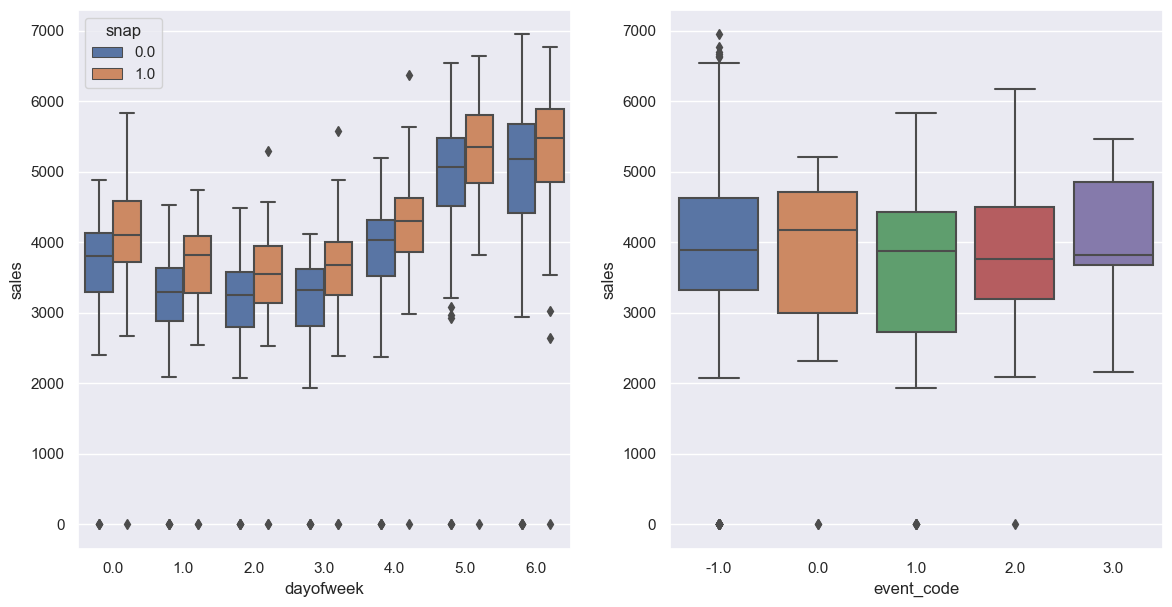

In [186]:
rows, cols = 1, 2
fig, axs = plt.subplots(ncols=cols, nrows=rows, figsize=(7*cols, 7*rows))
axs = axs.flatten()


sns.boxplot(x = 'dayofweek', y = "sales", hue = 'snap', data = df_medium, ax = axs[0])
sns.boxplot(x = 'event_code', y = "sales", data = df_medium, ax = axs[1])


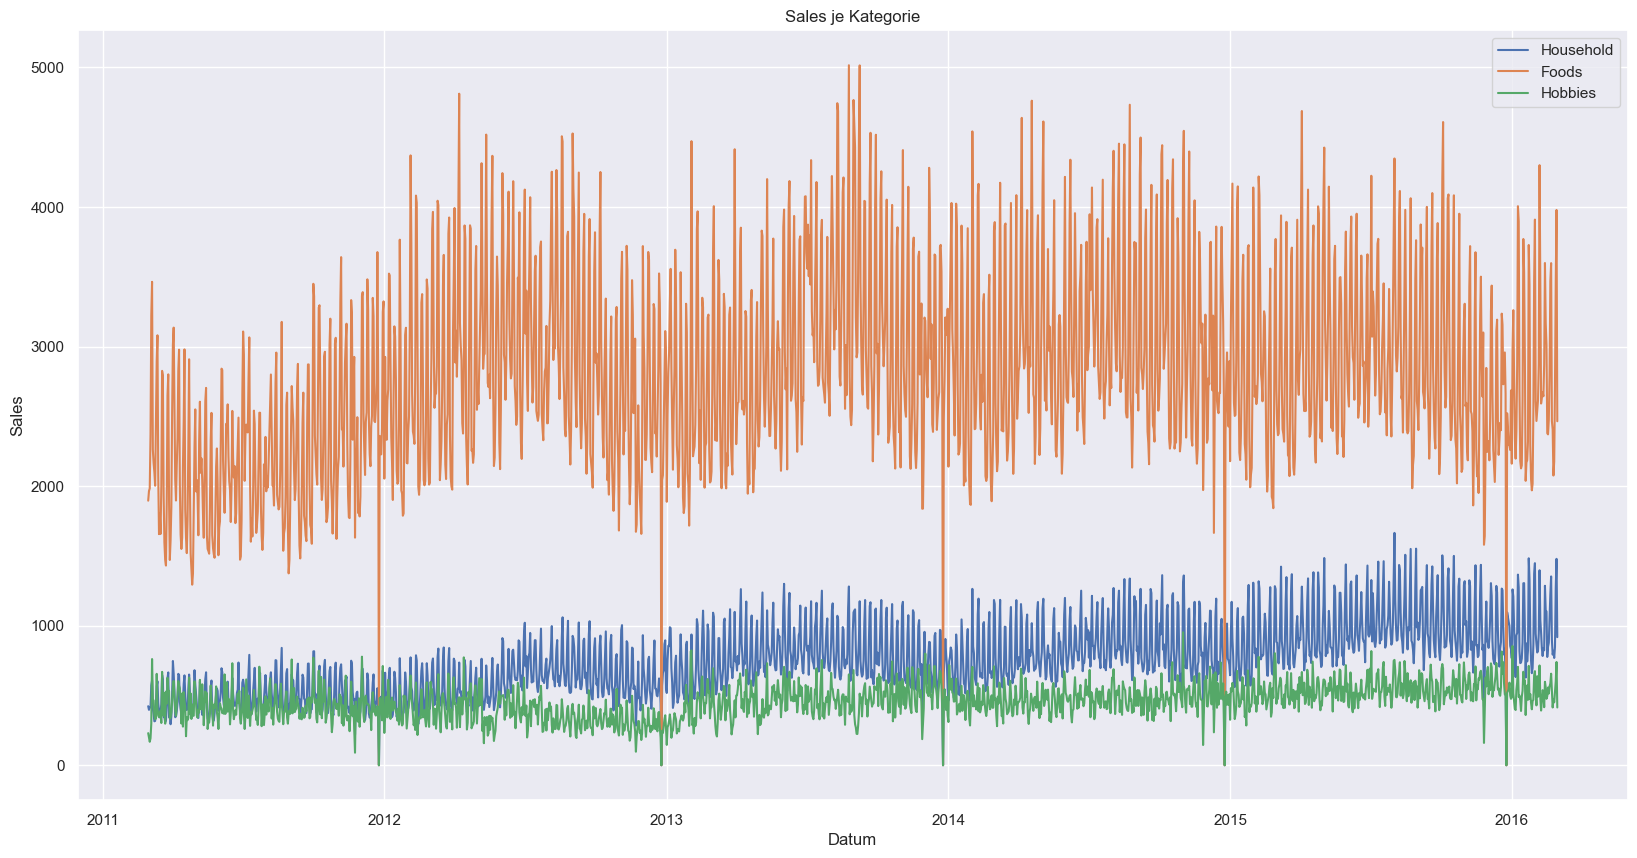

In [197]:
plt.plot(df_household_past.index,df_household_past['sales'],label="Household")
plt.plot(df_foods_past.index,df_foods_past['sales'],label="Foods")
plt.plot(df_hobbies_past.index,df_hobbies_past['sales'],label="Hobbies")
plt.title('Sales je Kategorie')
plt.xlabel("Datum")
plt.ylabel("Sales")
plt.legend(loc='upper right')
plt.show()

### Modellbildung

#### Random Forest Regressor (Simple DF)

In [274]:
df_simple

,sales,dayofweek,month
date,,,
2011-03-01,2549.0,1.0,3.0
2011-03-02,2559.0,2.0,3.0
2011-03-03,2568.0,3.0,3.0
2011-03-04,2978.0,4.0,3.0
2011-03-05,4096.0,5.0,3.0
...,...,...,...
2016-03-27,0.0,6.0,3.0
2016-03-28,0.0,0.0,3.0
2016-03-29,0.0,1.0,3.0


In [275]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error as MAE

rf_simple = RandomForestRegressor(random_state=42)
x_train, x_test, y_train, y_test = train_test_split(X_simple, y_simple, test_size=31, shuffle = False)
rf_simple.fit(x_train, y_train)

# predict on the same period
preds = rf_simple.predict(x_test)
print('MAE:\t %4.2f' % (MAE(y_true = y_test, y_pred = preds)))

MAE:	 454.12


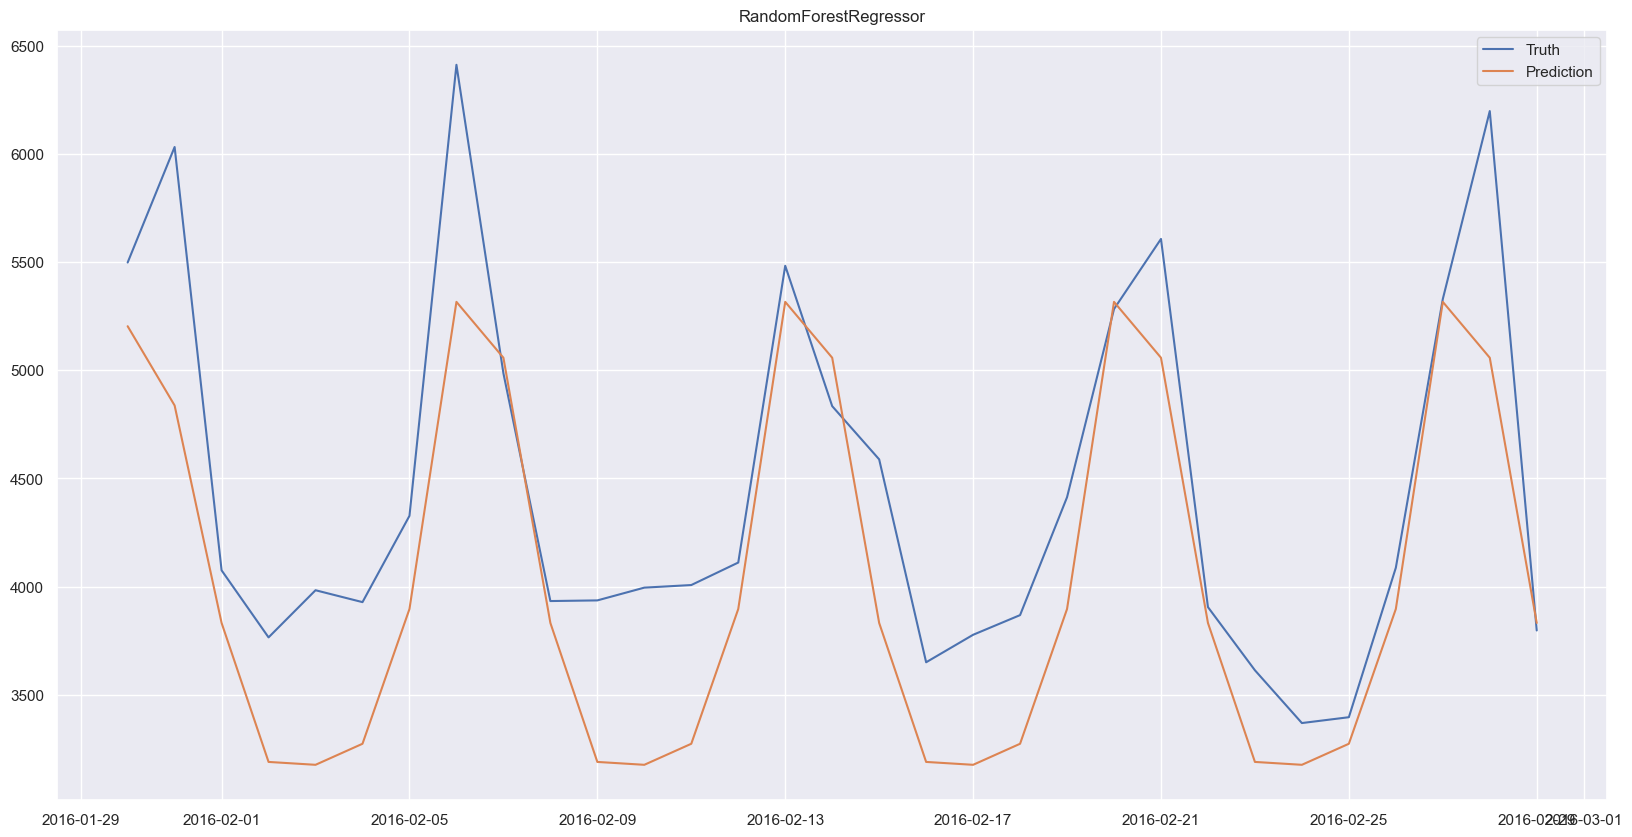

In [276]:
plt.plot(y_test.index, y_test)
plt.plot(y_test.index, preds)
plt.title('RandomForestRegressor')
plt.legend(['Truth','Prediction'])

In [277]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import TimeSeriesSplit

cv = TimeSeriesSplit(
    n_splits=5,
    test_size=31,
    gap=0
)

forecast = rf_simple
scores = pd.DataFrame(
    cross_validate(
        estimator=forecast,
        X=X_simple,
        y=y_simple,
        scoring = 'neg_mean_absolute_error',
        cv = cv,
        verbose = 0
    )
)
# display(scores)

print('MAE mean:\t %4.2f' % (-scores['test_score'].mean()))
print('MAE mad:\t %4.2f' % (scores['test_score'].mad()))

MAE mean:	 499.75
MAE mad:	 67.82


In [279]:
forecast_rf_simple_alldata = rf_simple.fit(X_simple, y_simple)


In [280]:
prediction_rf_simple_alldata = pd.Series(data = forecast_rf_simple_alldata.predict(df_simple_future), index = pd.date_range(start = df_simple_future.index.min(), end = df_simple_future.index.max()))
prediction_rf_simple_alldata.index.name = 'Date'
prediction_rf_simple_alldata.name = 'sales'

In [281]:
prediction_rf_simple_alldata

Date
2016-03-01    3109.135559
2016-03-02    2978.838651
2016-03-03    3129.121638
2016-03-04    3844.314847
2016-03-05    4981.063855
2016-03-06    5202.424866
2016-03-07    3585.079067
2016-03-08    3109.135559
2016-03-09    2978.838651
2016-03-10    3129.121638
2016-03-11    3844.314847
2016-03-12    4981.063855
2016-03-13    5202.424866
2016-03-14    3585.079067
2016-03-15    3109.135559
2016-03-16    2978.838651
2016-03-17    3129.121638
2016-03-18    3844.314847
2016-03-19    4981.063855
2016-03-20    5202.424866
2016-03-21    3585.079067
2016-03-22    3109.135559
2016-03-23    2978.838651
2016-03-24    3129.121638
2016-03-25    3844.314847
2016-03-26    4981.063855
2016-03-27    5202.424866
2016-03-28    3585.079067
2016-03-29    3109.135559
2016-03-30    2978.838651
2016-03-31    3129.121638
Freq: D, Name: sales, dtype: float64

In [282]:
prediction_rf_simple_alldata.to_csv('rf_simple_alldata.csv')

#### Random Forest Regressor (Medium DF)

In [225]:
df_medium

,sales,dayofweek,month,price,event_code,snap
date,,,,,,
2011-03-01,2549.0,1.0,3.0,4.167098,-1.0,1.0
2011-03-02,2559.0,2.0,3.0,4.167098,-1.0,1.0
2011-03-03,2568.0,3.0,3.0,4.167098,-1.0,1.0
2011-03-04,2978.0,4.0,3.0,4.167098,-1.0,1.0
2011-03-05,4096.0,5.0,3.0,4.157467,-1.0,1.0
...,...,...,...,...,...,...
2016-03-27,0.0,6.0,3.0,4.489718,0.0,0.0
2016-03-28,0.0,0.0,3.0,4.489718,-1.0,0.0
2016-03-29,0.0,1.0,3.0,4.489718,-1.0,0.0


In [380]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error as MAE

rf_medium = RandomForestRegressor(n_estimators=1000,criterion='squared_error', max_depth= 8,max_features='log2',max_leaf_nodes = 650,random_state=42, min_samples_split = 9)
x_train, x_test, y_train, y_test = train_test_split(X_medium, y_medium, test_size=31, shuffle = False)
rf_medium.fit(x_train, y_train)

# predict on the same period
preds = rf_medium.predict(x_test)
print('MAE:\t %4.2f' % (MAE(y_true = y_test, y_pred = preds)))

MAE:	 226.82


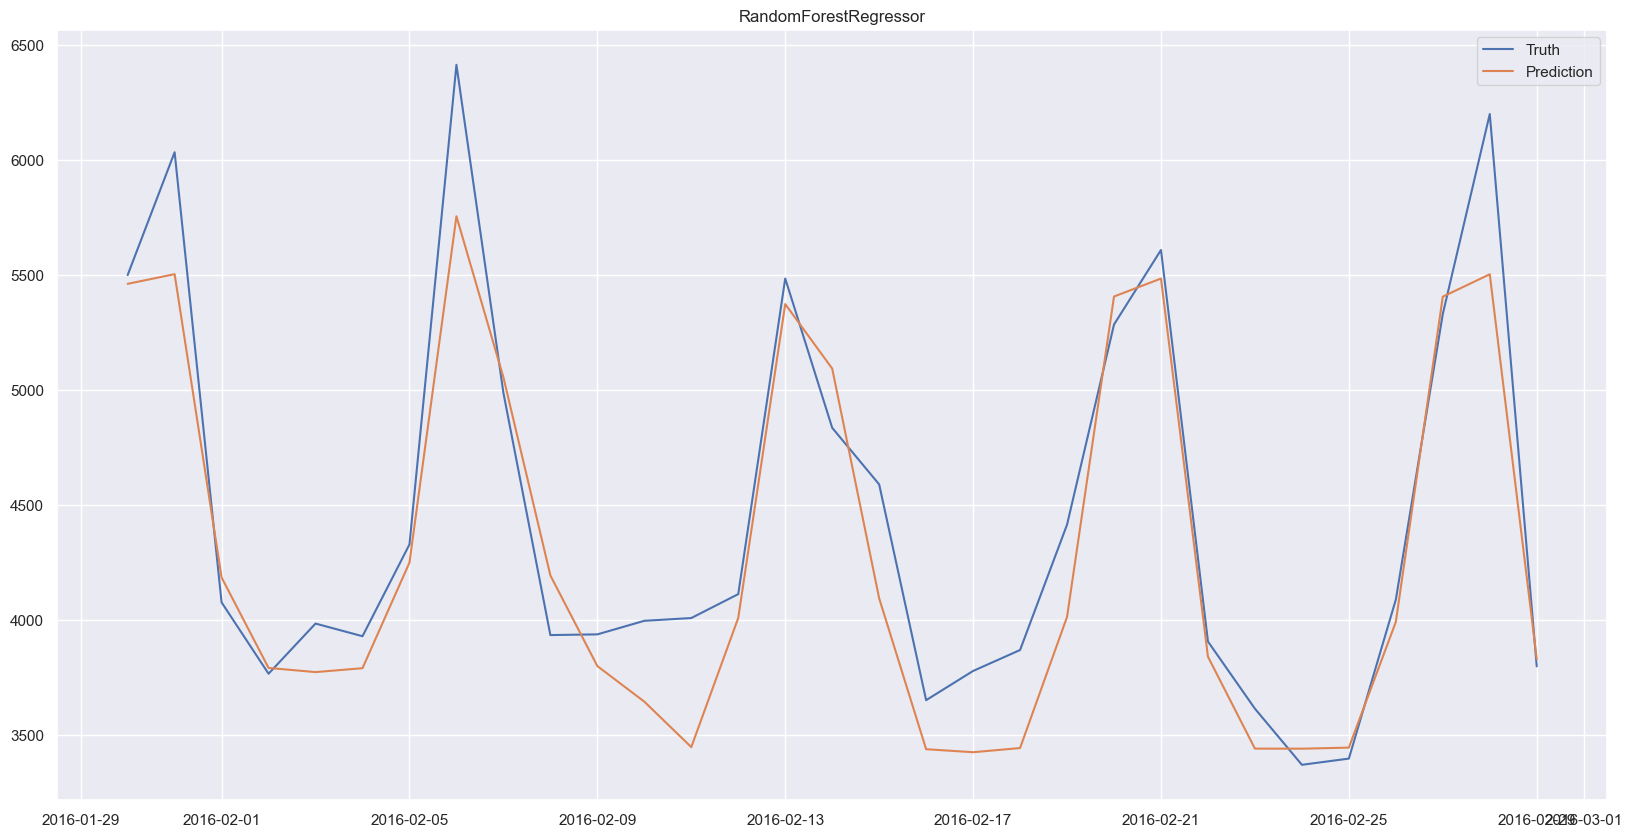

In [381]:
plt.plot(y_test.index, y_test)
plt.plot(y_test.index, preds)
plt.title('RandomForestRegressor')
plt.legend(['Truth','Prediction'])

In [382]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import TimeSeriesSplit

cv = TimeSeriesSplit(
    n_splits=5,
    test_size=31,
    gap=0
)

forecast = rf_medium
scores = pd.DataFrame(
    cross_validate(
        estimator=forecast,
        X=X_medium,
        y=y_medium,
        scoring = 'neg_mean_absolute_error',
        cv = cv,
        verbose = 0
    )
)
# display(scores)

print('MAE mean:\t %4.2f' % (-scores['test_score'].mean()))
print('MAE mad:\t %4.2f' % (scores['test_score'].mad()))

MAE mean:	 321.87
MAE mad:	 79.69


In [383]:
forecast_rf_medium_alldata = rf_medium.fit(X_medium, y_medium)

prediction_rf_medium_alldata = pd.Series(data = forecast_rf_medium_alldata.predict(df_medium_future), index = pd.date_range(start = df_medium_future.index.min(), end = df_medium_future.index.max()))
prediction_rf_medium_alldata.index.name = 'Date'
prediction_rf_medium_alldata.name = 'sales'

prediction_rf_medium_alldata

Date
2016-03-01    3830.380014
2016-03-02    3816.226527
2016-03-03    3821.563946
2016-03-04    4247.231581
2016-03-05    5757.110612
2016-03-06    5784.214331
2016-03-07    4117.184483
2016-03-08    3832.928728
2016-03-09    3818.775240
2016-03-10    3824.112659
2016-03-11    4086.217949
2016-03-12    5337.134313
2016-03-13    5516.505535
2016-03-14    3862.421734
2016-03-15    3517.969961
2016-03-16    3515.243637
2016-03-17    3469.162072
2016-03-18    4087.090903
2016-03-19    5358.664594
2016-03-20    5528.312938
2016-03-21    3861.483508
2016-03-22    3517.810191
2016-03-23    3515.083866
2016-03-24    3505.421528
2016-03-25    4086.217949
2016-03-26    5337.134313
2016-03-27    5010.507731
2016-03-28    3862.421734
2016-03-29    3517.969961
2016-03-30    3515.243637
2016-03-31    3523.434253
Freq: D, Name: sales, dtype: float64

In [384]:
prediction_rf_medium_alldata.to_csv('rf_medium_alldata.csv')

### Random Forest Regressor (DF Complex)

#### Foods

In [289]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error as MAE

rf_foods = RandomForestRegressor(random_state=42)
x_train, x_test, y_train, y_test = train_test_split(X_foods, y_foods, test_size=31, shuffle = False)
rf_foods.fit(x_train, y_train)

# predict on the same period
preds = rf_foods.predict(x_test)
print('MAE:\t %4.2f' % (MAE(y_true = y_test, y_pred = preds)))

MAE:	 239.75


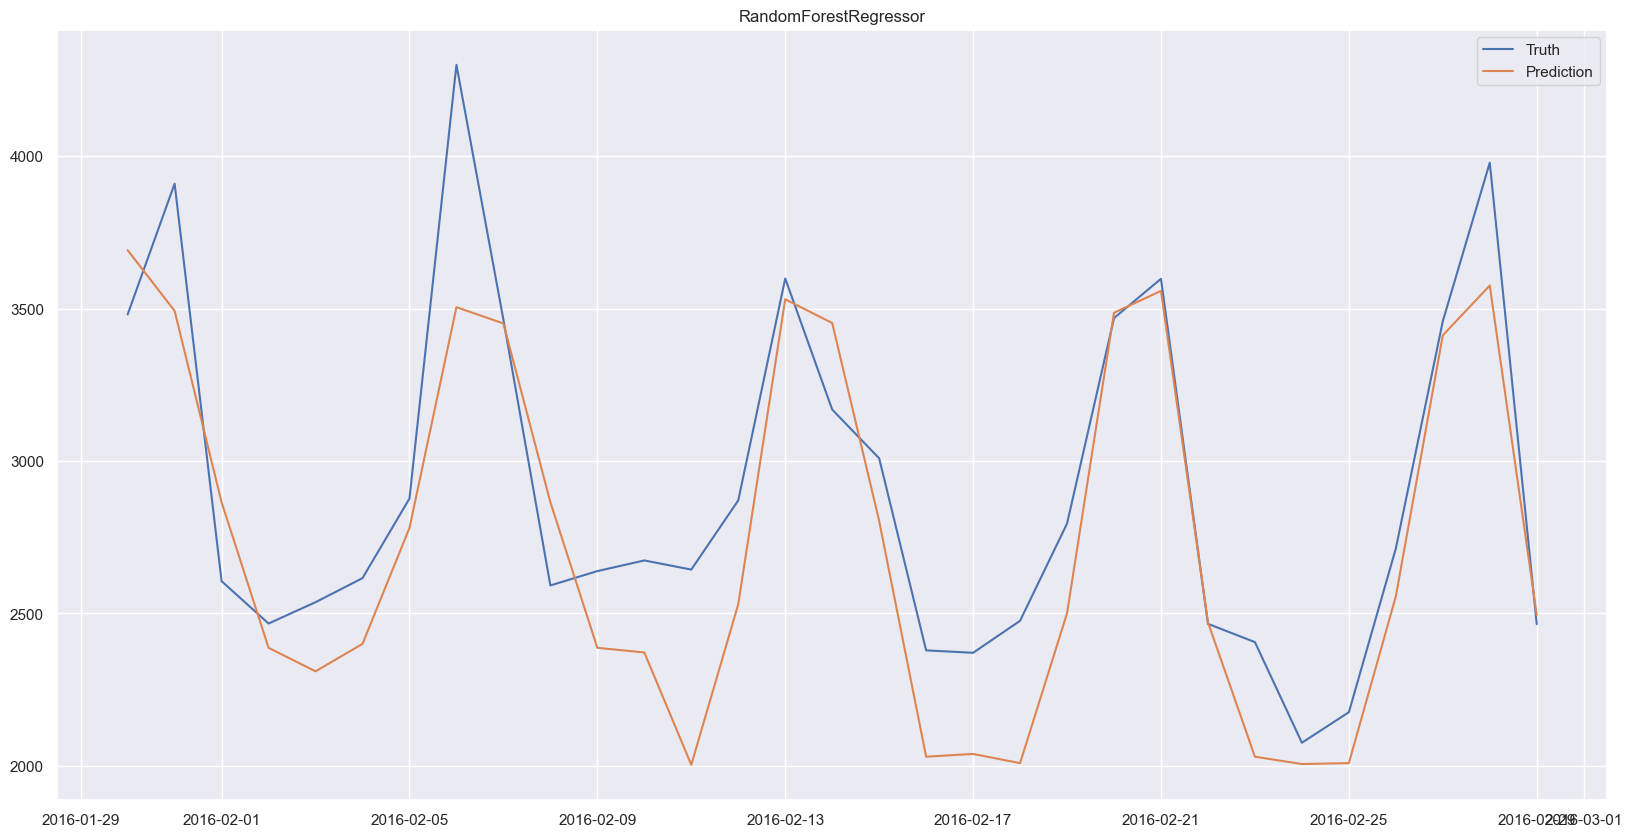

In [290]:
plt.plot(y_test.index, y_test)
plt.plot(y_test.index, preds)
plt.title('RandomForestRegressor')
plt.legend(['Truth','Prediction'])

In [291]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import TimeSeriesSplit

cv = TimeSeriesSplit(
    n_splits=5,
    test_size=31,
    gap=0
)

forecast = rf_foods
scores = pd.DataFrame(
    cross_validate(
        estimator=forecast,
        X=X_foods,
        y=y_foods,
        scoring = 'neg_mean_absolute_error',
        cv = cv,
        verbose = 0
    )
)
# display(scores)

print('MAE mean:\t %4.2f' % (-scores['test_score'].mean()))
print('MAE mad:\t %4.2f' % (scores['test_score'].mad()))

MAE mean:	 282.00
MAE mad:	 47.89


In [292]:
forecast_rf_foods_alldata = rf_foods.fit(X_foods, y_foods)

prediction_rf_foods_alldata = pd.Series(data = forecast_rf_foods_alldata.predict(df_foods_future), index = pd.date_range(start = df_foods_future.index.min(), end = df_foods_future.index.max()))
prediction_rf_foods_alldata.index.name = 'Date'
prediction_rf_foods_alldata.name = 'sales'

prediction_rf_foods_alldata

Date
2016-03-01    2466.84
2016-03-02    2446.71
2016-03-03    2463.96
2016-03-04    2891.01
2016-03-05    3851.86
2016-03-06    3903.15
2016-03-07    2689.65
2016-03-08    2465.52
2016-03-09    2445.82
2016-03-10    2463.73
2016-03-11    2743.53
2016-03-12    3408.28
2016-03-13    3838.71
2016-03-14    2516.41
2016-03-15    2229.31
2016-03-16    2177.24
2016-03-17    2107.33
2016-03-18    2743.53
2016-03-19    3548.82
2016-03-20    3766.07
2016-03-21    2488.52
2016-03-22    2192.55
2016-03-23    2113.21
2016-03-24    2254.91
2016-03-25    2710.40
2016-03-26    3403.17
2016-03-27    3459.78
2016-03-28    2512.10
2016-03-29    2229.31
2016-03-30    2177.24
2016-03-31    2132.08
Freq: D, Name: sales, dtype: float64

#### Household

In [294]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error as MAE

rf_household = RandomForestRegressor(random_state=42)
x_train, x_test, y_train, y_test = train_test_split(X_household, y_household, test_size=31, shuffle = False)
rf_household.fit(x_train, y_train)

# predict on the same period
preds = rf_household.predict(x_test)
print('MAE:\t %4.2f' % (MAE(y_true = y_test, y_pred = preds)))

MAE:	 138.04


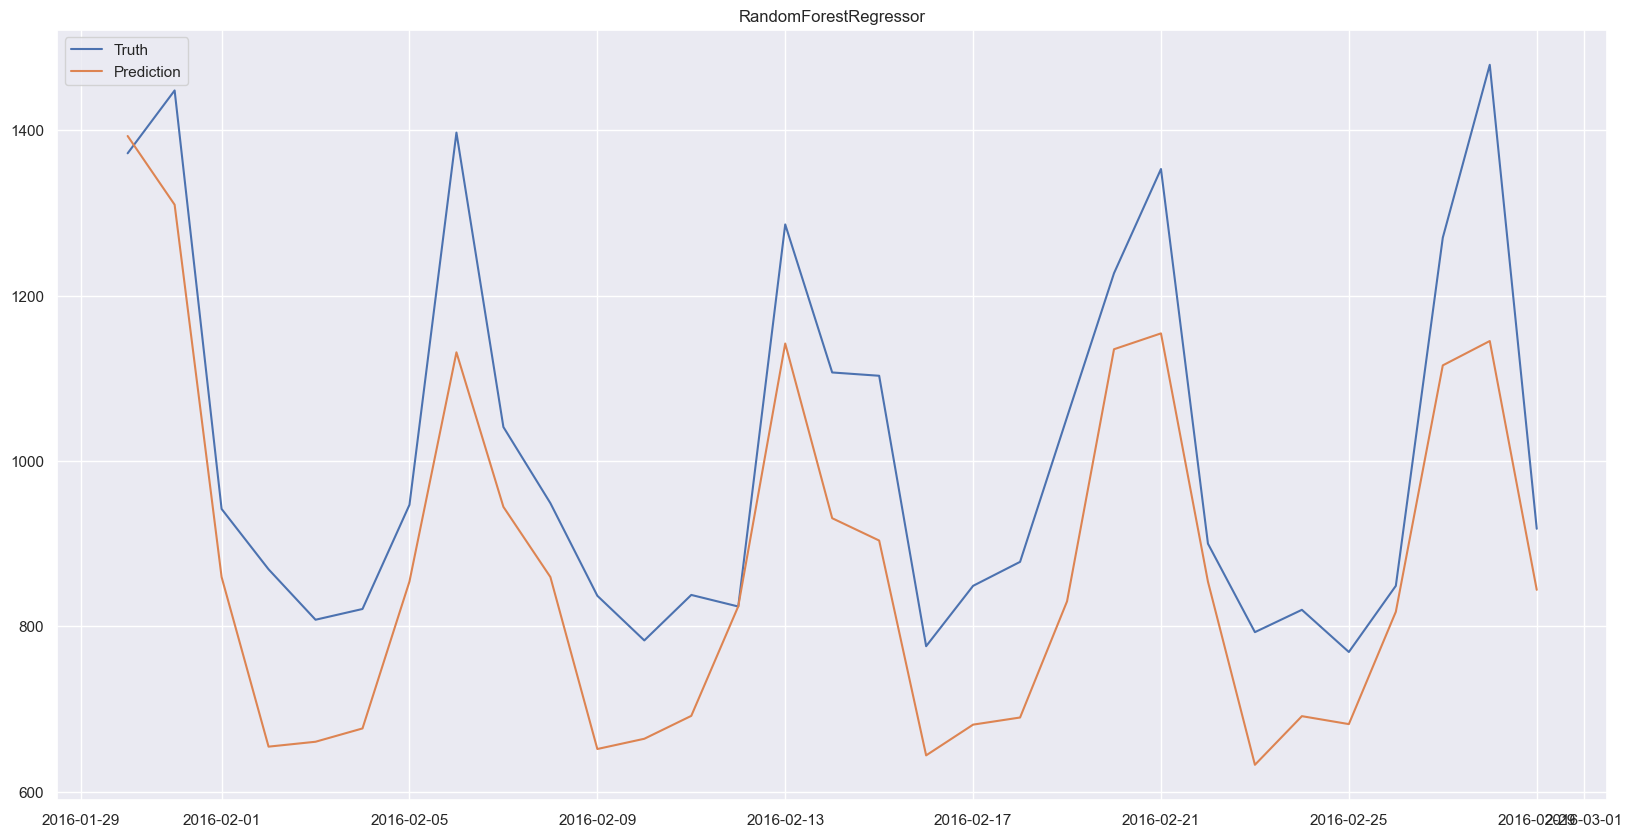

In [295]:
plt.plot(y_test.index, y_test)
plt.plot(y_test.index, preds)
plt.title('RandomForestRegressor')
plt.legend(['Truth','Prediction'])

In [296]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import TimeSeriesSplit

cv = TimeSeriesSplit(
    n_splits=5,
    test_size=31,
    gap=0
)

forecast = rf_household
scores = pd.DataFrame(
    cross_validate(
        estimator=forecast,
        X=X_household,
        y=y_household,
        scoring = 'neg_mean_absolute_error',
        cv = cv,
        verbose = 0
    )
)
# display(scores)

print('MAE mean:\t %4.2f' % (-scores['test_score'].mean()))
print('MAE mad:\t %4.2f' % (scores['test_score'].mad()))


MAE mean:	 132.87
MAE mad:	 25.22


In [297]:
forecast_rf_household_alldata = rf_household.fit(X_household, y_household)

prediction_rf_household_alldata = pd.Series(data = forecast_rf_household_alldata.predict(df_household_future), index = pd.date_range(start = df_household_future.index.min(), end = df_household_future.index.max()))
prediction_rf_household_alldata.index.name = 'Date'
prediction_rf_household_alldata.name = 'sales'

prediction_rf_household_alldata

Date
2016-03-01     797.68
2016-03-02     800.23
2016-03-03     791.54
2016-03-04     866.64
2016-03-05    1220.22
2016-03-06    1313.16
2016-03-07     916.69
2016-03-08     728.68
2016-03-09     753.36
2016-03-10     748.30
2016-03-11     846.02
2016-03-12    1226.36
2016-03-13    1350.60
2016-03-14     896.33
2016-03-15     707.91
2016-03-16     750.63
2016-03-17     741.80
2016-03-18     838.78
2016-03-19    1226.36
2016-03-20    1350.60
2016-03-21     896.33
2016-03-22     707.91
2016-03-23     750.63
2016-03-24     744.63
2016-03-25     838.78
2016-03-26    1234.10
2016-03-27    1013.13
2016-03-28     898.92
2016-03-29     716.41
2016-03-30     760.80
2016-03-31     749.73
Freq: D, Name: sales, dtype: float64

#### Hobbies

In [299]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error as MAE

rf_hobbies = RandomForestRegressor(random_state=42)
x_train, x_test, y_train, y_test = train_test_split(X_hobbies, y_hobbies, test_size=31, shuffle = False)
rf_hobbies.fit(x_train, y_train)

# predict on the same period
preds = rf_hobbies.predict(x_test)
print('MAE:\t %4.2f' % (MAE(y_true = y_test, y_pred = preds)))

MAE:	 85.32


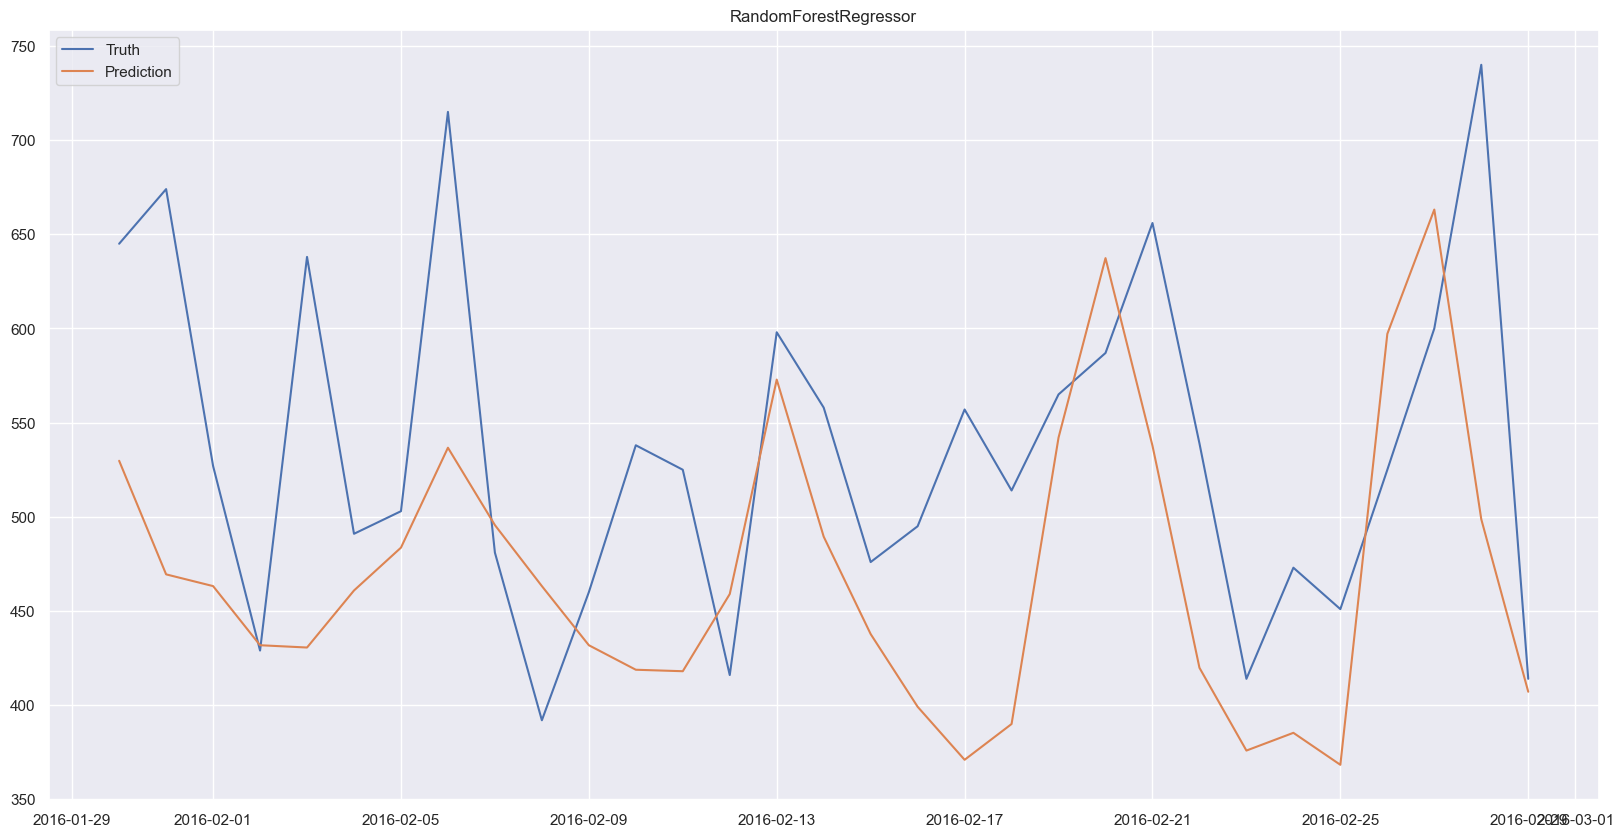

In [300]:
plt.plot(y_test.index, y_test)
plt.plot(y_test.index, preds)
plt.title('RandomForestRegressor')
plt.legend(['Truth','Prediction'])


In [301]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import TimeSeriesSplit

cv = TimeSeriesSplit(
    n_splits=5,
    test_size=31,
    gap=0
)

forecast = rf_hobbies
scores = pd.DataFrame(
    cross_validate(
        estimator=forecast,
        X=X_hobbies,
        y=y_hobbies,
        scoring = 'neg_mean_absolute_error',
        cv = cv,
        verbose = 0
    )
)
# display(scores)

print('MAE mean:\t %4.2f' % (-scores['test_score'].mean()))
print('MAE mad:\t %4.2f' % (scores['test_score'].mad()))


MAE mean:	 73.57
MAE mad:	 11.92


In [302]:
forecast_rf_hobbies_alldata = rf_hobbies.fit(X_hobbies, y_hobbies)

prediction_rf_hobbies_alldata = pd.Series(data = forecast_rf_hobbies_alldata.predict(df_hobbies_future), index = pd.date_range(start = df_hobbies_future.index.min(), end = df_hobbies_future.index.max()))
prediction_rf_hobbies_alldata.index.name = 'Date'
prediction_rf_hobbies_alldata.name = 'sales'

prediction_rf_hobbies_alldata

Date
2016-03-01    475.250000
2016-03-02    456.130833
2016-03-03    444.657500
2016-03-04    525.006667
2016-03-05    558.140000
2016-03-06    476.870000
2016-03-07    452.973500
2016-03-08    444.840143
2016-03-09    540.972500
2016-03-10    489.100000
2016-03-11    452.790000
2016-03-12    521.190000
2016-03-13    477.220000
2016-03-14    426.765000
2016-03-15    463.615000
2016-03-16    470.075000
2016-03-17    425.706667
2016-03-18    429.710000
2016-03-19    521.190000
2016-03-20    477.220000
2016-03-21    426.765000
2016-03-22    463.615000
2016-03-23    470.075000
2016-03-24    393.960000
2016-03-25    429.710000
2016-03-26    521.190000
2016-03-27    492.270000
2016-03-28    426.765000
2016-03-29    463.615000
2016-03-30    470.075000
2016-03-31    437.156667
Freq: D, Name: sales, dtype: float64

In [308]:
prediction_rf_complex_alldata = prediction_rf_hobbies_alldata + prediction_rf_foods_alldata + prediction_rf_household_alldata
prediction_rf_complex_alldata

In [310]:
prediction_rf_complex_alldata.to_csv('rf_complex_alldata.csv')

### Alt

In [16]:
df['holiday'] = df['event_type_1'].notnull().astype('int')

In [17]:
df

,week_id,event_name_1,event_type_1,event_name_2,event_type_2,snap,item_id,dept_id,cat_id,sales,price,yearcw,DayOfWeek,Month,WeekOfYear,DayOfMonth,holiday
date,,,,,,,,,,,,,,,,,
2011-03-01,11105,NaN,NaN,NaN,NaN,True,HOBBIES_1_001,HOBBIES_1,HOBBIES,0.0,0.0,201109,1,3,9,1,0
2011-03-01,11105,NaN,NaN,NaN,NaN,True,HOBBIES_1_002,HOBBIES_1,HOBBIES,0.0,0.0,201109,1,3,9,1,0
2011-03-01,11105,NaN,NaN,NaN,NaN,True,HOBBIES_1_003,HOBBIES_1,HOBBIES,0.0,0.0,201109,1,3,9,1,0
2011-03-01,11105,NaN,NaN,NaN,NaN,True,HOBBIES_1_004,HOBBIES_1,HOBBIES,0.0,0.0,201109,1,3,9,1,0
2011-03-01,11105,NaN,NaN,NaN,NaN,True,HOBBIES_1_005,HOBBIES_1,HOBBIES,0.0,0.0,201109,1,3,9,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-03-27,11609,Easter,Cultural,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,201612,6,3,12,27,1
2016-03-28,11609,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,201613,0,3,13,28,0
2016-03-29,11609,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,201613,1,3,13,29,0


In [18]:
linreginput = df[['sales','DayOfWeek','Month','WeekOfYear','DayOfMonth','holiday']]

In [19]:
linreginput[['DayOfWeek','Month','WeekOfYear','DayOfMonth']] = df[['DayOfWeek','Month','WeekOfYear','DayOfMonth']].astype('int')

C:\Users\daves\AppData\Local\Temp\ipykernel_16772\460134434.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  linreginput[['DayOfWeek','Month','WeekOfYear','DayOfMonth']] = df[['DayOfWeek','Month','WeekOfYear','DayOfMonth']].astype('int')


In [20]:
linreginput

,sales,DayOfWeek,Month,WeekOfYear,DayOfMonth,holiday
date,,,,,,
2011-03-01,0.0,1,3,9,1,0
2011-03-01,0.0,1,3,9,1,0
2011-03-01,0.0,1,3,9,1,0
2011-03-01,0.0,1,3,9,1,0
2011-03-01,0.0,1,3,9,1,0
...,...,...,...,...,...,...
2016-03-27,NaN,6,3,12,27,1
2016-03-28,NaN,0,3,13,28,0
2016-03-29,NaN,1,3,13,29,0


In [21]:
linreginput.dtypes

sales         float64
DayOfWeek       int32
Month           int32
WeekOfYear      int32
DayOfMonth      int32
holiday         int32
dtype: object

In [22]:
linreginput = linreginput.groupby(by=linreginput.index).agg({'sales':'sum','DayOfWeek':'mean','Month':'mean','WeekOfYear':'mean','DayOfMonth':'mean','holiday':'mean'})

In [23]:
linreginput.reset_index(inplace=True)

In [25]:
linreginput

,date,sales,DayOfWeek,Month,WeekOfYear,DayOfMonth,holiday
0,2011-03-01,2549.0,1.0,3.0,9.0,1.0,0.0
1,2011-03-02,2559.0,2.0,3.0,9.0,2.0,0.0
2,2011-03-03,2568.0,3.0,3.0,9.0,3.0,0.0
3,2011-03-04,2978.0,4.0,3.0,9.0,4.0,0.0
4,2011-03-05,4096.0,5.0,3.0,9.0,5.0,0.0
...,...,...,...,...,...,...,...
1853,2016-03-27,0.0,6.0,3.0,12.0,27.0,1.0
1854,2016-03-28,0.0,0.0,3.0,13.0,28.0,0.0
1855,2016-03-29,0.0,1.0,3.0,13.0,29.0,0.0
1856,2016-03-30,0.0,2.0,3.0,13.0,30.0,0.0


In [26]:
#linreginput = linreginput[linreginput['date']<'2016-03-01']

In [22]:
linreginput

,date,sales,DayOfWeek,Month,WeekOfYear,DayOfMonth,holiday
0,2011-03-01,2549.0,1.0,3.0,9.0,1.0,0.0
1,2011-03-02,2559.0,2.0,3.0,9.0,2.0,0.0
2,2011-03-03,2568.0,3.0,3.0,9.0,3.0,0.0
3,2011-03-04,2978.0,4.0,3.0,9.0,4.0,0.0
4,2011-03-05,4096.0,5.0,3.0,9.0,5.0,0.0
...,...,...,...,...,...,...,...
1853,2016-03-27,0.0,6.0,3.0,12.0,27.0,1.0
1854,2016-03-28,0.0,0.0,3.0,13.0,28.0,0.0
1855,2016-03-29,0.0,1.0,3.0,13.0,29.0,0.0
1856,2016-03-30,0.0,2.0,3.0,13.0,30.0,0.0


In [27]:
linreginput2 = pd.get_dummies(
    data = linreginput,
    columns = ['DayOfWeek','Month','WeekOfYear','DayOfMonth'],
    drop_first = False
)

In [28]:
linreginput2 = linreginput2.set_index('date')

In [29]:
linreginput2

,sales,holiday,DayOfWeek_0.0,DayOfWeek_1.0,DayOfWeek_2.0,DayOfWeek_3.0,DayOfWeek_4.0,DayOfWeek_5.0,DayOfWeek_6.0,Month_1.0,...,DayOfMonth_22.0,DayOfMonth_23.0,DayOfMonth_24.0,DayOfMonth_25.0,DayOfMonth_26.0,DayOfMonth_27.0,DayOfMonth_28.0,DayOfMonth_29.0,DayOfMonth_30.0,DayOfMonth_31.0
date,,,,,,,,,,,,,,,,,,,,,
2011-03-01,2549.0,0.0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2011-03-02,2559.0,0.0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2011-03-03,2568.0,0.0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2011-03-04,2978.0,0.0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2011-03-05,4096.0,0.0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-03-27,0.0,1.0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
2016-03-28,0.0,0.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2016-03-29,0.0,0.0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [30]:
linreginput_cut = linreginput2[linreginput2.index<'2016-03-01']
linreginput_last_month = linreginput2[linreginput2.index>='2016-03-01']
linreginput_last_month = linreginput_last_month.drop(columns =
[
    'sales',
    
]
)


In [31]:
linreginput_cut

,sales,holiday,DayOfWeek_0.0,DayOfWeek_1.0,DayOfWeek_2.0,DayOfWeek_3.0,DayOfWeek_4.0,DayOfWeek_5.0,DayOfWeek_6.0,Month_1.0,...,DayOfMonth_22.0,DayOfMonth_23.0,DayOfMonth_24.0,DayOfMonth_25.0,DayOfMonth_26.0,DayOfMonth_27.0,DayOfMonth_28.0,DayOfMonth_29.0,DayOfMonth_30.0,DayOfMonth_31.0
date,,,,,,,,,,,,,,,,,,,,,
2011-03-01,2549.0,0.0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2011-03-02,2559.0,0.0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2011-03-03,2568.0,0.0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2011-03-04,2978.0,0.0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2011-03-05,4096.0,0.0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-02-25,3396.0,0.0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2016-02-26,4087.0,0.0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2016-02-27,5329.0,0.0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [32]:
X = linreginput_cut.drop(columns =
[
    'sales',
    
]
)

In [33]:
X

,holiday,DayOfWeek_0.0,DayOfWeek_1.0,DayOfWeek_2.0,DayOfWeek_3.0,DayOfWeek_4.0,DayOfWeek_5.0,DayOfWeek_6.0,Month_1.0,Month_2.0,...,DayOfMonth_22.0,DayOfMonth_23.0,DayOfMonth_24.0,DayOfMonth_25.0,DayOfMonth_26.0,DayOfMonth_27.0,DayOfMonth_28.0,DayOfMonth_29.0,DayOfMonth_30.0,DayOfMonth_31.0
date,,,,,,,,,,,,,,,,,,,,,
2011-03-01,0.0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2011-03-02,0.0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2011-03-03,0.0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2011-03-04,0.0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2011-03-05,0.0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-02-25,0.0,0,0,0,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2016-02-26,0.0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2016-02-27,0.0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0


In [34]:
y = linreginput_cut['sales']
y

date
2011-03-01    2549.0
2011-03-02    2559.0
2011-03-03    2568.0
2011-03-04    2978.0
2011-03-05    4096.0
               ...  
2016-02-25    3396.0
2016-02-26    4087.0
2016-02-27    5329.0
2016-02-28    6198.0
2016-02-29    3797.0
Name: sales, Length: 1827, dtype: float64

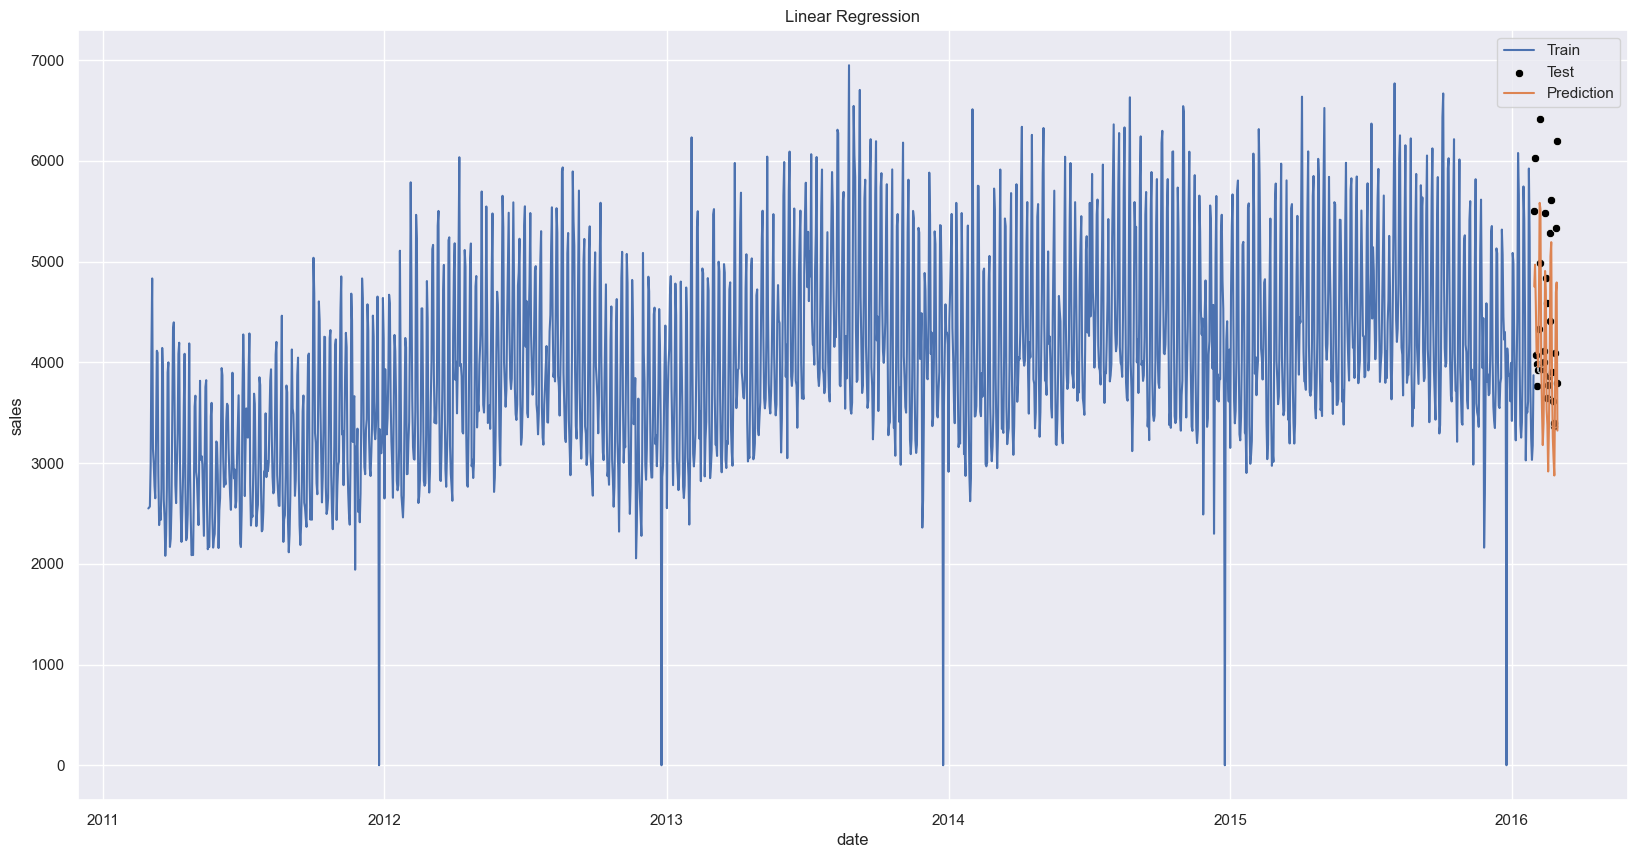

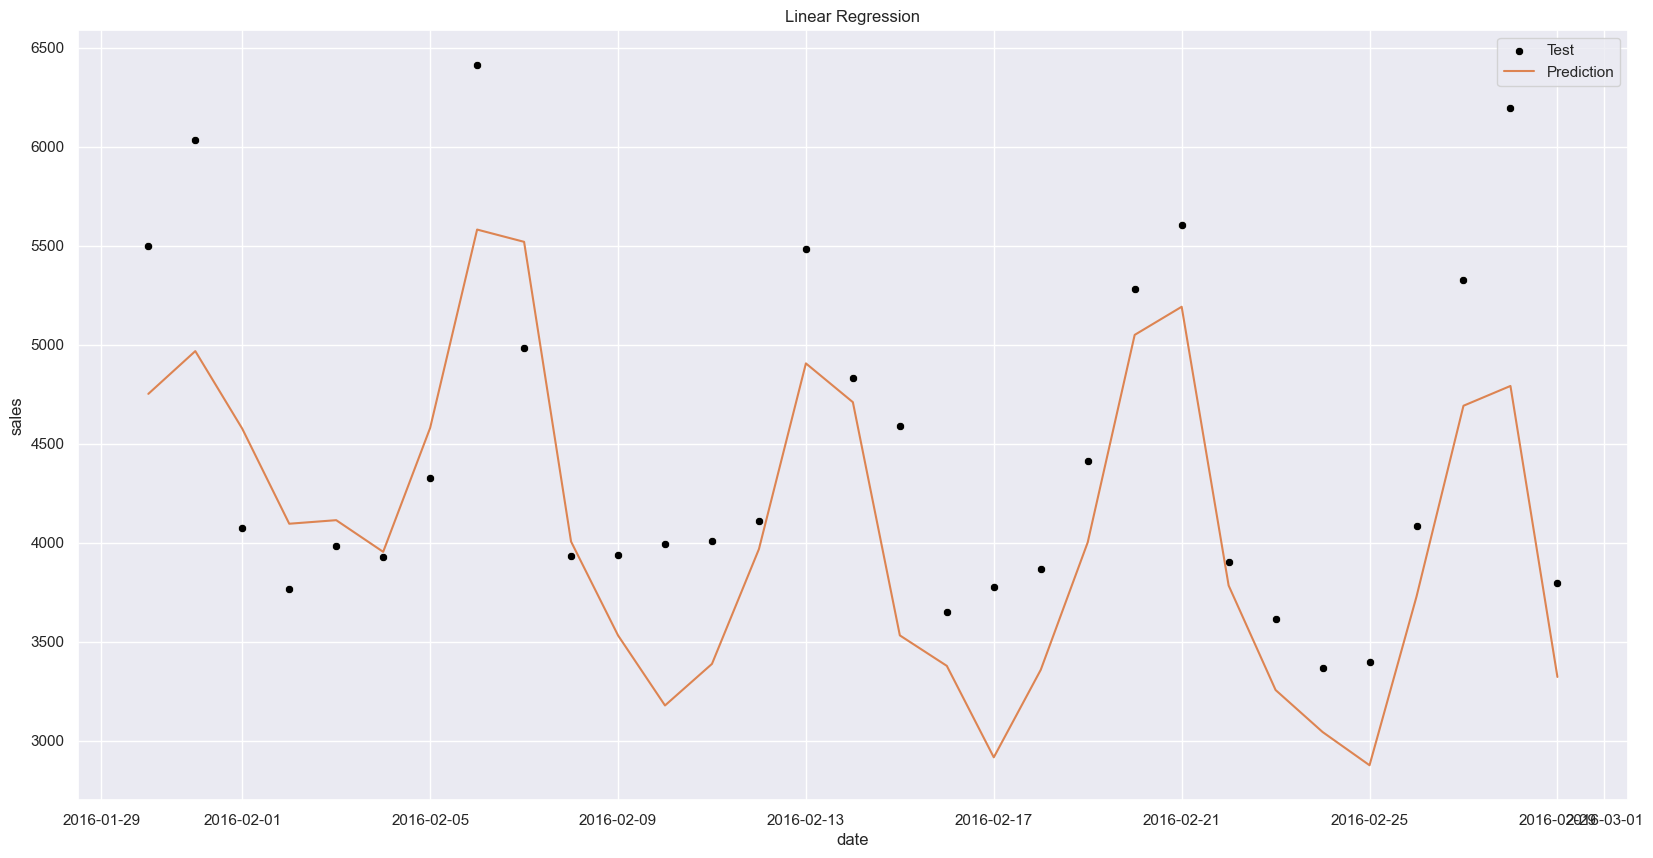

MAE:	 488.10


In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error as MAE

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=31, shuffle = False)

forecast = LinearRegression().fit(x_train, y_train)

prediction = pd.Series(data = forecast.predict(x_test), index = pd.date_range(start = x_test.index.min(), end = x_test.index.max()))
prediction.index.name = 'Date'
#
#prediction[prediction < 0] = 0
#
sns.lineplot(data = y_train, label = 'Train')
sns.scatterplot(data = y_test, color = 'black', label = 'Test')
sns.lineplot(data = prediction, label = 'Prediction')
plt.title('Linear Regression')
plt.show()
#
sns.scatterplot(data = y_test, color = 'black', label = 'Test')
sns.lineplot(data = prediction, color = sns.color_palette('deep').as_hex()[1], label = 'Prediction')
plt.title('Linear Regression')
plt.show()
#
print('MAE:\t %4.2f' % (MAE(y_true = y_test, y_pred = prediction)))

In [36]:
first_pred = pd.Series(data = forecast.predict(linreginput_last_month), index = pd.date_range(start = linreginput_last_month.index.min(), end = linreginput_last_month.index.max()))
first_pred.index.name = 'Date'

<AxesSubplot: xlabel='Date'>

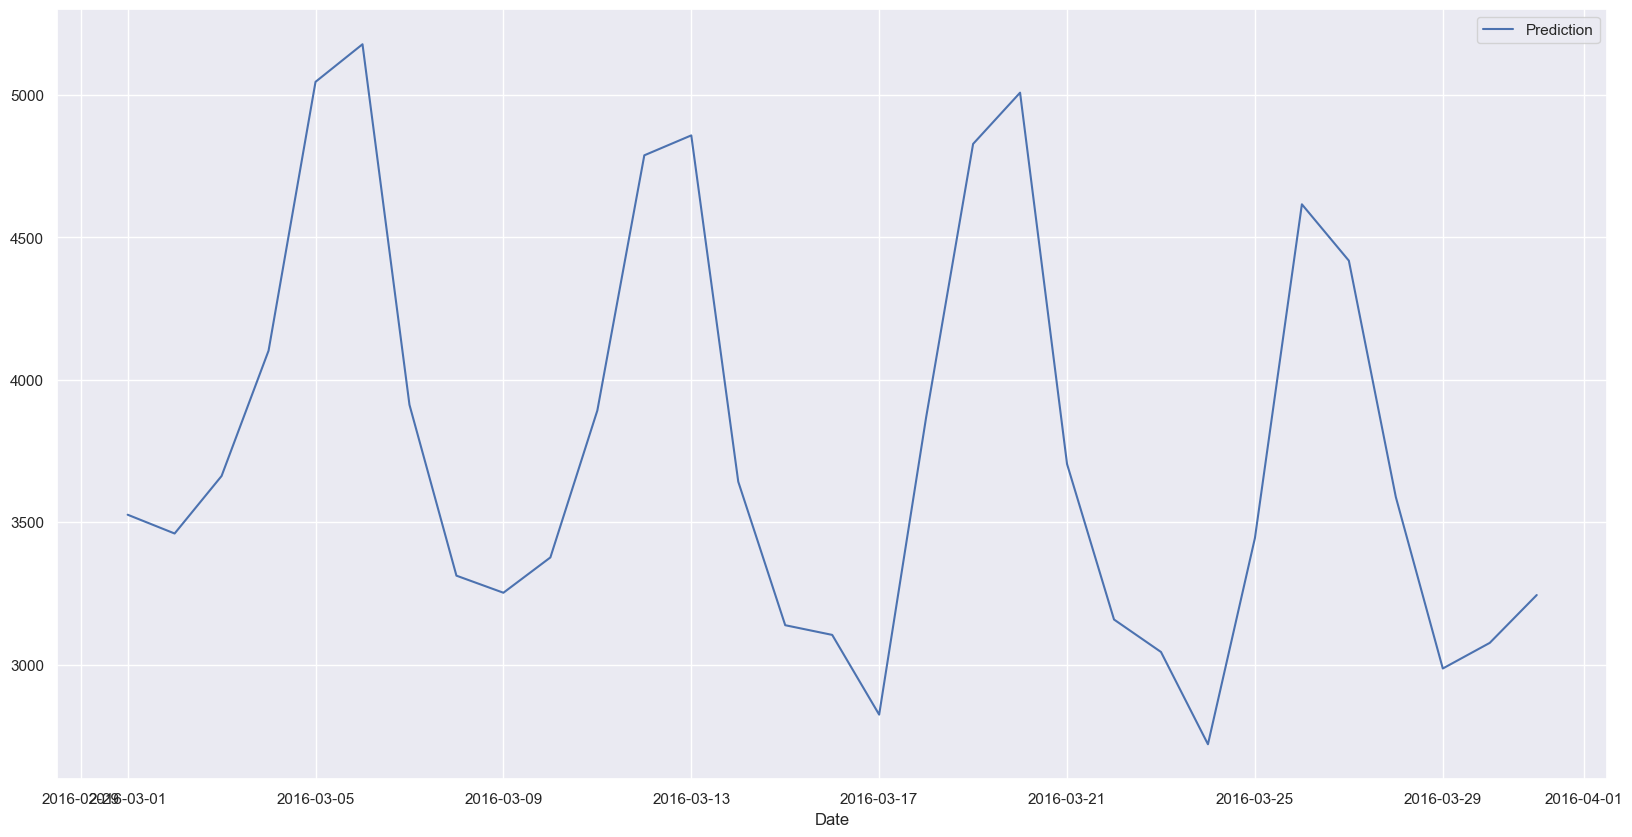

In [37]:
sns.lineplot(data = first_pred, label = 'Prediction')

In [39]:
first_pred.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 31 entries, 2016-03-01 to 2016-03-31
Freq: D
Series name: sales
Non-Null Count  Dtype  
--------------  -----  
31 non-null     float64
dtypes: float64(1)
memory usage: 496.0 bytes


In [38]:
first_pred.name = 'sales'

In [40]:
first_pred

Date
2016-03-01    3526.0
2016-03-02    3460.0
2016-03-03    3662.0
2016-03-04    4102.0
2016-03-05    5046.0
2016-03-06    5178.0
2016-03-07    3912.0
2016-03-08    3312.0
2016-03-09    3252.0
2016-03-10    3376.0
2016-03-11    3892.0
2016-03-12    4788.0
2016-03-13    4858.0
2016-03-14    3642.0
2016-03-15    3138.0
2016-03-16    3104.0
2016-03-17    2824.0
2016-03-18    3868.0
2016-03-19    4828.0
2016-03-20    5008.0
2016-03-21    3704.0
2016-03-22    3158.0
2016-03-23    3044.0
2016-03-24    2720.0
2016-03-25    3444.0
2016-03-26    4616.0
2016-03-27    4418.0
2016-03-28    3588.0
2016-03-29    2986.0
2016-03-30    3076.0
2016-03-31    3244.0
Freq: D, Name: sales, dtype: float64

In [382]:
first_pred.to_csv('first_linreg.csv')

Test Nur day of the week

In [41]:
linreginput_dayoftheweek = pd.get_dummies(
    data = linreginput,
    columns = ['DayOfWeek'],
    drop_first = False
)

In [42]:
linreginput_dayoftheweek

,date,sales,Month,WeekOfYear,DayOfMonth,holiday,DayOfWeek_0.0,DayOfWeek_1.0,DayOfWeek_2.0,DayOfWeek_3.0,DayOfWeek_4.0,DayOfWeek_5.0,DayOfWeek_6.0
0,2011-03-01,2549.0,3.0,9.0,1.0,0.0,0,1,0,0,0,0,0
1,2011-03-02,2559.0,3.0,9.0,2.0,0.0,0,0,1,0,0,0,0
2,2011-03-03,2568.0,3.0,9.0,3.0,0.0,0,0,0,1,0,0,0
3,2011-03-04,2978.0,3.0,9.0,4.0,0.0,0,0,0,0,1,0,0
4,2011-03-05,4096.0,3.0,9.0,5.0,0.0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1853,2016-03-27,0.0,3.0,12.0,27.0,1.0,0,0,0,0,0,0,1
1854,2016-03-28,0.0,3.0,13.0,28.0,0.0,1,0,0,0,0,0,0
1855,2016-03-29,0.0,3.0,13.0,29.0,0.0,0,1,0,0,0,0,0
1856,2016-03-30,0.0,3.0,13.0,30.0,0.0,0,0,1,0,0,0,0


In [43]:
linreginput_dayoftheweek = linreginput_dayoftheweek.set_index('date')

In [44]:
linreginput_cut_dayoftheweek = linreginput_dayoftheweek[linreginput_dayoftheweek.index<'2016-03-01']
linreginput_dayoftheweek_last_month = linreginput_dayoftheweek[linreginput_dayoftheweek.index>='2016-03-01']
linreginput_dayoftheweek_last_month = linreginput_dayoftheweek_last_month.drop(columns =
[
    'sales',
    
]
)

In [45]:
linreginput_dayoftheweek_last_month

,Month,WeekOfYear,DayOfMonth,holiday,DayOfWeek_0.0,DayOfWeek_1.0,DayOfWeek_2.0,DayOfWeek_3.0,DayOfWeek_4.0,DayOfWeek_5.0,DayOfWeek_6.0
date,,,,,,,,,,,
2016-03-01,3.0,9.0,1.0,0.0,0,1,0,0,0,0,0
2016-03-02,3.0,9.0,2.0,0.0,0,0,1,0,0,0,0
2016-03-03,3.0,9.0,3.0,0.0,0,0,0,1,0,0,0
2016-03-04,3.0,9.0,4.0,0.0,0,0,0,0,1,0,0
2016-03-05,3.0,9.0,5.0,0.0,0,0,0,0,0,1,0
2016-03-06,3.0,9.0,6.0,0.0,0,0,0,0,0,0,1
2016-03-07,3.0,10.0,7.0,0.0,1,0,0,0,0,0,0
2016-03-08,3.0,10.0,8.0,0.0,0,1,0,0,0,0,0
2016-03-09,3.0,10.0,9.0,0.0,0,0,1,0,0,0,0


In [46]:
X2 = linreginput_cut_dayoftheweek.drop(columns =
[
    'sales',
    
]
)

In [47]:
X2

,Month,WeekOfYear,DayOfMonth,holiday,DayOfWeek_0.0,DayOfWeek_1.0,DayOfWeek_2.0,DayOfWeek_3.0,DayOfWeek_4.0,DayOfWeek_5.0,DayOfWeek_6.0
date,,,,,,,,,,,
2011-03-01,3.0,9.0,1.0,0.0,0,1,0,0,0,0,0
2011-03-02,3.0,9.0,2.0,0.0,0,0,1,0,0,0,0
2011-03-03,3.0,9.0,3.0,0.0,0,0,0,1,0,0,0
2011-03-04,3.0,9.0,4.0,0.0,0,0,0,0,1,0,0
2011-03-05,3.0,9.0,5.0,0.0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
2016-02-25,2.0,8.0,25.0,0.0,0,0,0,1,0,0,0
2016-02-26,2.0,8.0,26.0,0.0,0,0,0,0,1,0,0
2016-02-27,2.0,8.0,27.0,0.0,0,0,0,0,0,1,0


In [48]:
y2 = linreginput_cut_dayoftheweek['sales']
y2

date
2011-03-01    2549.0
2011-03-02    2559.0
2011-03-03    2568.0
2011-03-04    2978.0
2011-03-05    4096.0
               ...  
2016-02-25    3396.0
2016-02-26    4087.0
2016-02-27    5329.0
2016-02-28    6198.0
2016-02-29    3797.0
Name: sales, Length: 1827, dtype: float64

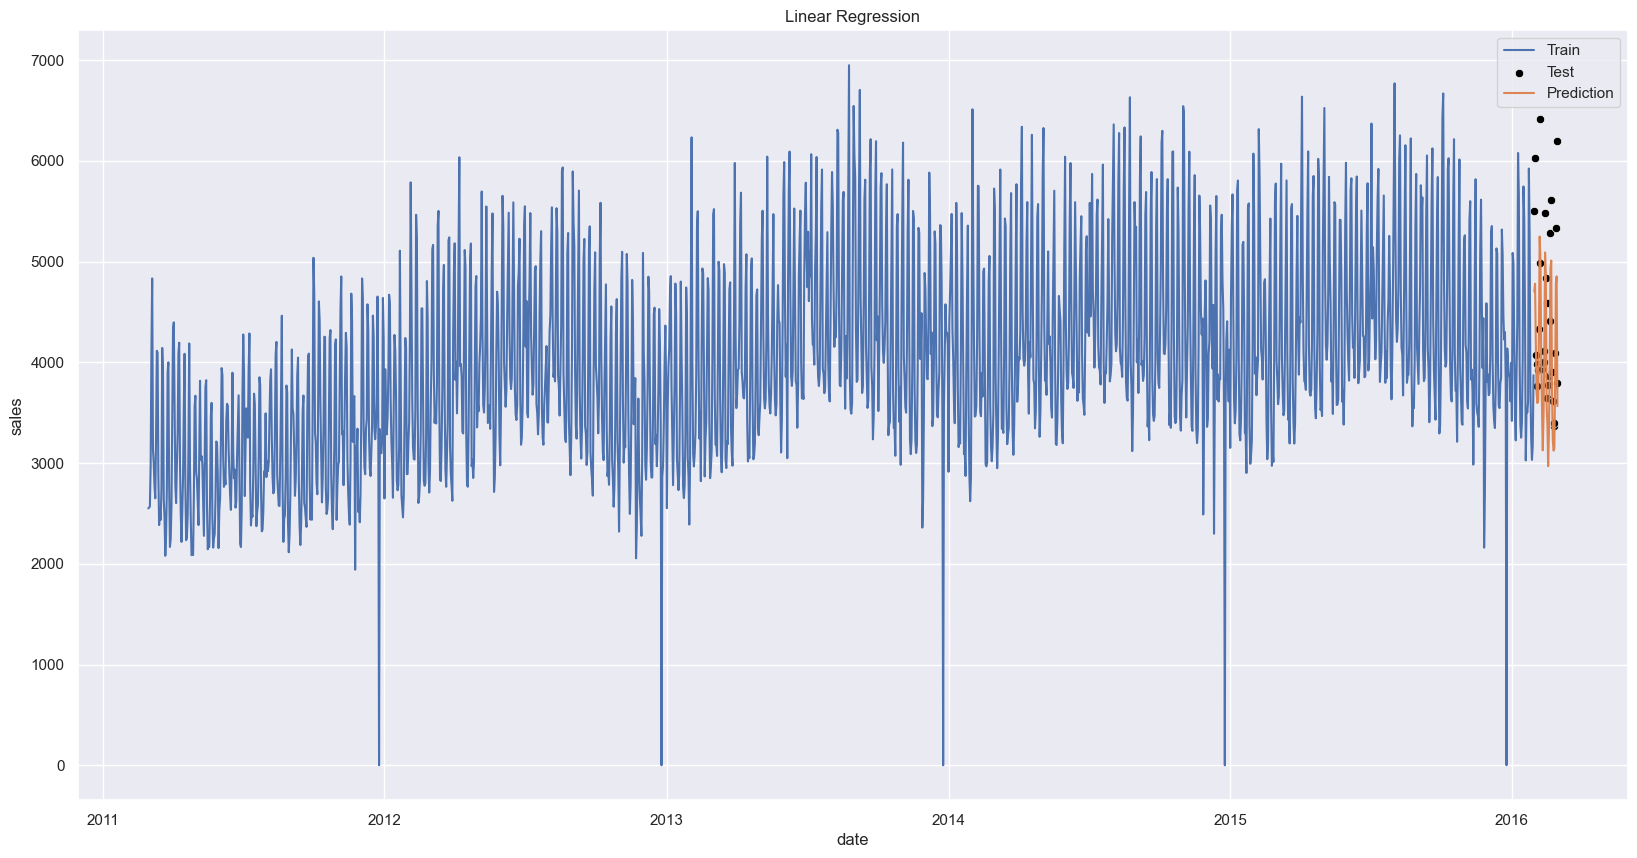

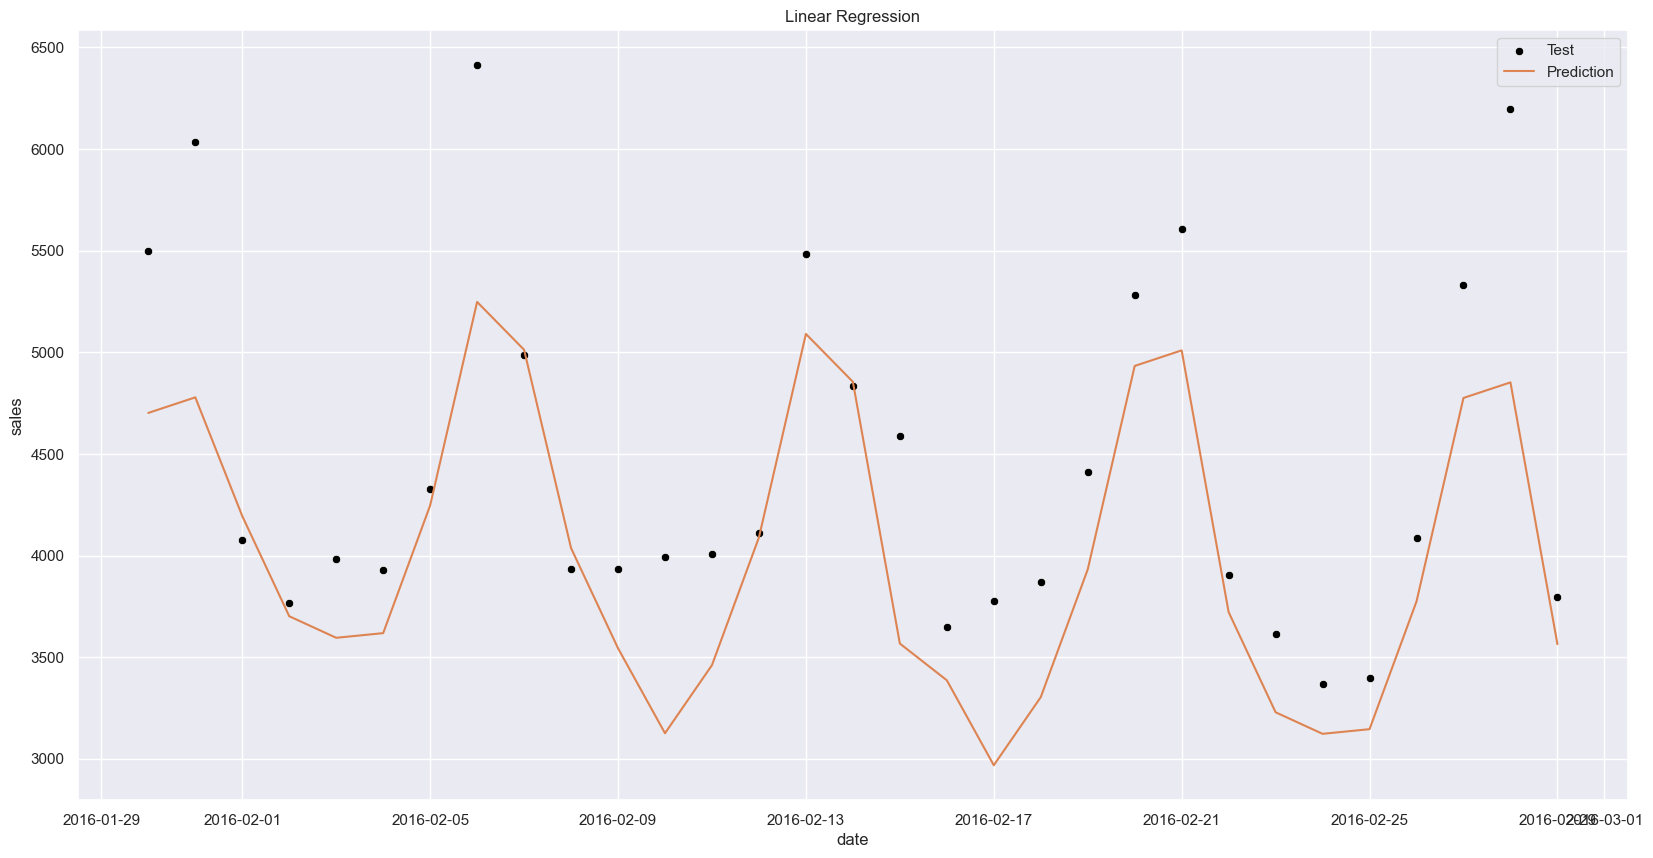

MAE:	 456.19


In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error as MAE

x_train, x_test, y_train, y_test = train_test_split(X2, y2, test_size=31, shuffle = False)

forecast2 = LinearRegression().fit(x_train, y_train)

prediction2 = pd.Series(data = forecast2.predict(x_test), index = pd.date_range(start = x_test.index.min(), end = x_test.index.max()))
prediction2.index.name = 'Date'
#
#prediction[prediction < 0] = 0
#
sns.lineplot(data = y_train, label = 'Train')
sns.scatterplot(data = y_test, color = 'black', label = 'Test')
sns.lineplot(data = prediction2, label = 'Prediction')
plt.title('Linear Regression')
plt.show()
#
sns.scatterplot(data = y_test, color = 'black', label = 'Test')
sns.lineplot(data = prediction2, color = sns.color_palette('deep').as_hex()[1], label = 'Prediction')
plt.title('Linear Regression')
plt.show()
#
print('MAE:\t %4.2f' % (MAE(y_true = y_test, y_pred = prediction2)))

### Test ohne xtest xtrain

In [54]:
forecast2_alldata = LinearRegression().fit(X2, y2)

In [55]:
prediction2_alldata = pd.Series(data = forecast2_alldata.predict(linreginput_dayoftheweek_last_month), index = pd.date_range(start = linreginput_dayoftheweek_last_month.index.min(), end = linreginput_dayoftheweek_last_month.index.max()))
prediction2_alldata.index.name = 'Date'

In [58]:
prediction2_alldata.index.name = 'Date'

In [56]:
prediction2_alldata

2016-03-01    3741.763412
2016-03-02    3640.507468
2016-03-03    3661.222754
2016-03-04    4287.382016
2016-03-05    5297.896178
2016-03-06    5373.635992
2016-03-07    4078.594939
2016-03-08    3586.510849
2016-03-09    3485.254905
2016-03-10    3505.970191
2016-03-11    4132.129453
2016-03-12    5142.643615
2016-03-13    5218.383429
2016-03-14    3923.342376
2016-03-15    3431.258286
2016-03-16    3330.002341
2016-03-17    3047.956965
2016-03-18    3976.876890
2016-03-19    4987.391052
2016-03-20    5063.130866
2016-03-21    3768.089813
2016-03-22    3276.005722
2016-03-23    3174.749778
2016-03-24    2892.704402
2016-03-25    3821.624327
2016-03-26    4832.138489
2016-03-27    4605.117640
2016-03-28    3612.837250
2016-03-29    3120.753159
2016-03-30    3019.497215
2016-03-31    3040.212501
Freq: D, dtype: float64

In [60]:
prediction2_alldata.name = 'sales'
prediction2_alldata.to_csv('simple_linreg_all_data_test.csv')

### Test Ende 

In [50]:
second_pred = pd.Series(data = forecast2.predict(linreginput_dayoftheweek_last_month), index = pd.date_range(start = linreginput_dayoftheweek_last_month.index.min(), end = linreginput_dayoftheweek_last_month.index.max()))
second_pred.index.name = 'Date'

In [434]:
second_pred.name = 'sales'
second_pred.to_csv('second_linreg.csv')

In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import cross_validate

cv = TimeSeriesSplit(
    n_splits=5,
    test_size=31,
    gap=0
)

forecast = LinearRegression()
scores = pd.DataFrame(
    cross_validate(
        estimator=forecast,
        X=X2,
        y=y2,
        scoring = 'neg_mean_absolute_error',
        cv = cv,
        verbose = 0
    )
)
# display(scores)

print('MAE mean:\t %4.2f' % (-scores['test_score'].mean()))
print('MAE mad:\t %4.2f' % (scores['test_score'].mad()))

MAE mean:	 431.12
MAE mad:	 49.68


C:\Users\edwin\AppData\Local\Temp\ipykernel_15268\1293804157.py:25: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  print('MAE mad:\t %4.2f' % (scores['test_score'].mad()))


# Test anderer Modelle

### 1. Versuch XGBoost

In [48]:
import xgboost as xgb
my_xgb = xgb.XGBRegressor()
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=31, shuffle = False)
my_xgb.fit(x_train,y_train)
preds = my_xgb.predict(x_test)
print('MAE:\t %4.2f' % (MAE(y_true = y_test, y_pred = preds)))


MAE:	 524.07


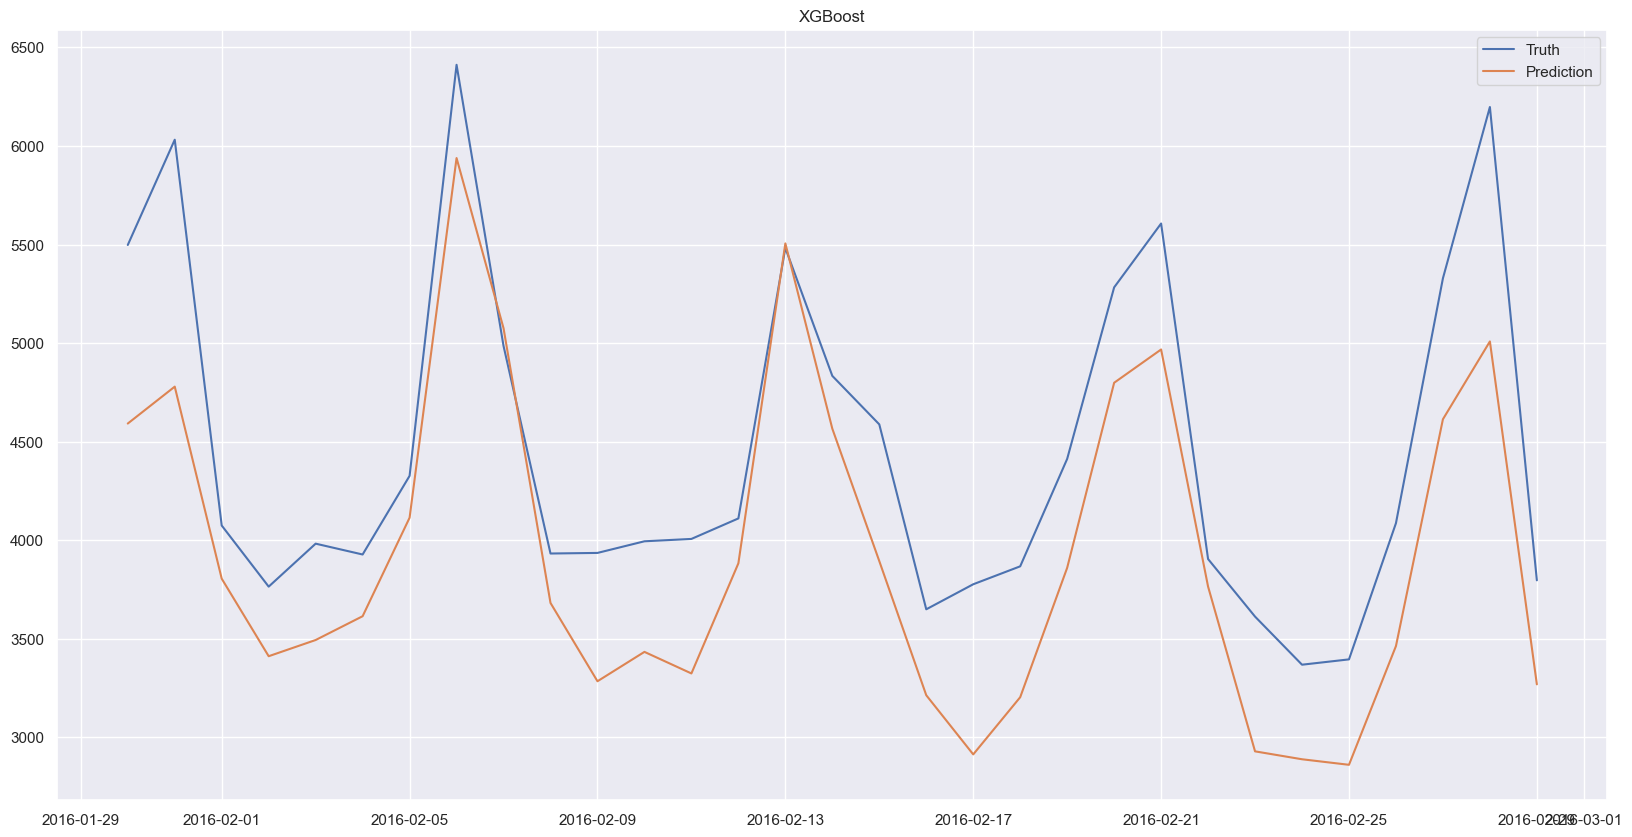

In [49]:
plt.plot(y_test.index, y_test)
plt.plot(y_test.index, preds)
plt.title('XGBoost')
plt.legend(['Truth','Prediction'])


### RandomForestRegressor 

In [50]:
df

,week_id,event_name_1,event_type_1,event_name_2,event_type_2,snap,item_id,dept_id,cat_id,sales,price,yearcw,DayOfWeek,Month,WeekOfYear,DayOfMonth,holiday
date,,,,,,,,,,,,,,,,,
2011-03-01,11105,NaN,NaN,NaN,NaN,True,HOBBIES_1_001,HOBBIES_1,HOBBIES,0.0,0.0,201109,1,3,9,1,0
2011-03-01,11105,NaN,NaN,NaN,NaN,True,HOBBIES_1_002,HOBBIES_1,HOBBIES,0.0,0.0,201109,1,3,9,1,0
2011-03-01,11105,NaN,NaN,NaN,NaN,True,HOBBIES_1_003,HOBBIES_1,HOBBIES,0.0,0.0,201109,1,3,9,1,0
2011-03-01,11105,NaN,NaN,NaN,NaN,True,HOBBIES_1_004,HOBBIES_1,HOBBIES,0.0,0.0,201109,1,3,9,1,0
2011-03-01,11105,NaN,NaN,NaN,NaN,True,HOBBIES_1_005,HOBBIES_1,HOBBIES,0.0,0.0,201109,1,3,9,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-03-27,11609,Easter,Cultural,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,201612,6,3,12,27,1
2016-03-28,11609,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,201613,0,3,13,28,0
2016-03-29,11609,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,201613,1,3,13,29,0


In [51]:
rf_input = df[['sales','DayOfWeek','Month','WeekOfYear','DayOfMonth','holiday','snap','event_name_1','event_type_1']]

In [52]:
#rf_input.reset_index(inplace=True)
rf_input

,sales,DayOfWeek,Month,WeekOfYear,DayOfMonth,holiday,snap,event_name_1,event_type_1
date,,,,,,,,,
2011-03-01,0.0,1,3,9,1,0,True,NaN,NaN
2011-03-01,0.0,1,3,9,1,0,True,NaN,NaN
2011-03-01,0.0,1,3,9,1,0,True,NaN,NaN
2011-03-01,0.0,1,3,9,1,0,True,NaN,NaN
2011-03-01,0.0,1,3,9,1,0,True,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2016-03-27,NaN,6,3,12,27,1,False,Easter,Cultural
2016-03-28,NaN,0,3,13,28,0,False,NaN,NaN
2016-03-29,NaN,1,3,13,29,0,False,NaN,NaN


In [53]:
rf_input['event_name_1'].unique()

array([nan, 'LentStart', 'LentWeek2', 'StPatricksDay', 'Purim End',
       'OrthodoxEaster', 'Pesach End', 'Cinco De Mayo', "Mother's day",
       'MemorialDay', 'NBAFinalsStart', 'NBAFinalsEnd', "Father's day",
       'IndependenceDay', 'Ramadan starts', 'Eid al-Fitr', 'LaborDay',
       'ColumbusDay', 'Halloween', 'EidAlAdha', 'VeteransDay',
       'Thanksgiving', 'Christmas', 'Chanukah End', 'NewYear',
       'OrthodoxChristmas', 'MartinLutherKingDay', 'SuperBowl',
       'ValentinesDay', 'PresidentsDay', 'Easter'], dtype=object)

In [54]:
rf_input2 = pd.get_dummies(
    data = rf_input,
    columns = ['event_name_1','event_type_1'],
    drop_first = False
)
rf_input2['snap'] = rf_input2['snap'].astype(int)
rf_input2[['event_name_1_Chanukah End',
       'event_name_1_Christmas', 'event_name_1_Cinco De Mayo',
       'event_name_1_ColumbusDay', 'event_name_1_Easter',
       'event_name_1_Eid al-Fitr', 'event_name_1_EidAlAdha',
       "event_name_1_Father's day", 'event_name_1_Halloween',
       'event_name_1_IndependenceDay', 'event_name_1_LaborDay',
       'event_name_1_LentStart', 'event_name_1_LentWeek2',
       'event_name_1_MartinLutherKingDay', 'event_name_1_MemorialDay',
       "event_name_1_Mother's day", 'event_name_1_NBAFinalsEnd',
       'event_name_1_NBAFinalsStart', 'event_name_1_NewYear',
       'event_name_1_OrthodoxChristmas', 'event_name_1_OrthodoxEaster',
       'event_name_1_Pesach End', 'event_name_1_PresidentsDay',
       'event_name_1_Purim End', 'event_name_1_Ramadan starts',
       'event_name_1_StPatricksDay', 'event_name_1_SuperBowl',
       'event_name_1_Thanksgiving', 'event_name_1_ValentinesDay',
       'event_name_1_VeteransDay', 'event_type_1_Cultural',
       'event_type_1_National', 'event_type_1_Religious',
       'event_type_1_Sporting']] = rf_input2[['event_name_1_Chanukah End',
       'event_name_1_Christmas', 'event_name_1_Cinco De Mayo',
       'event_name_1_ColumbusDay', 'event_name_1_Easter',
       'event_name_1_Eid al-Fitr', 'event_name_1_EidAlAdha',
       "event_name_1_Father's day", 'event_name_1_Halloween',
       'event_name_1_IndependenceDay', 'event_name_1_LaborDay',
       'event_name_1_LentStart', 'event_name_1_LentWeek2',
       'event_name_1_MartinLutherKingDay', 'event_name_1_MemorialDay',
       "event_name_1_Mother's day", 'event_name_1_NBAFinalsEnd',
       'event_name_1_NBAFinalsStart', 'event_name_1_NewYear',
       'event_name_1_OrthodoxChristmas', 'event_name_1_OrthodoxEaster',
       'event_name_1_Pesach End', 'event_name_1_PresidentsDay',
       'event_name_1_Purim End', 'event_name_1_Ramadan starts',
       'event_name_1_StPatricksDay', 'event_name_1_SuperBowl',
       'event_name_1_Thanksgiving', 'event_name_1_ValentinesDay',
       'event_name_1_VeteransDay', 'event_type_1_Cultural',
       'event_type_1_National', 'event_type_1_Religious',
       'event_type_1_Sporting']].astype(int)

In [55]:
rf_input2[['DayOfWeek','Month','WeekOfYear','DayOfMonth']] = rf_input2[['DayOfWeek','Month','WeekOfYear','DayOfMonth']].astype('int')

In [56]:
rf_input2

,sales,DayOfWeek,Month,WeekOfYear,DayOfMonth,holiday,snap,event_name_1_Chanukah End,event_name_1_Christmas,event_name_1_Cinco De Mayo,...,event_name_1_Ramadan starts,event_name_1_StPatricksDay,event_name_1_SuperBowl,event_name_1_Thanksgiving,event_name_1_ValentinesDay,event_name_1_VeteransDay,event_type_1_Cultural,event_type_1_National,event_type_1_Religious,event_type_1_Sporting
date,,,,,,,,,,,,,,,,,,,,,
2011-03-01,0.0,1,3,9,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2011-03-01,0.0,1,3,9,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2011-03-01,0.0,1,3,9,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2011-03-01,0.0,1,3,9,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2011-03-01,0.0,1,3,9,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-03-27,NaN,6,3,12,27,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2016-03-28,NaN,0,3,13,28,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2016-03-29,NaN,1,3,13,29,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [57]:
rf_input2 = rf_input2.groupby(by=rf_input2.index).agg({'sales':'sum','DayOfWeek':'mean','Month':'mean','WeekOfYear':'mean','DayOfMonth':'mean','holiday':'mean','snap':'mean','event_name_1_Chanukah End':'mean',
       'event_name_1_Christmas':'mean', 'event_name_1_Cinco De Mayo':'mean',
       'event_name_1_ColumbusDay':'mean', 'event_name_1_Easter':'mean',
       'event_name_1_Eid al-Fitr':'mean', 'event_name_1_EidAlAdha':'mean',
       "event_name_1_Father's day":'mean', 'event_name_1_Halloween':'mean',
       'event_name_1_IndependenceDay':'mean', 'event_name_1_LaborDay':'mean',
       'event_name_1_LentStart':'mean', 'event_name_1_LentWeek2':'mean',
       'event_name_1_MartinLutherKingDay':'mean', 'event_name_1_MemorialDay':'mean',
       "event_name_1_Mother's day":'mean', 'event_name_1_NBAFinalsEnd':'mean',
       'event_name_1_NBAFinalsStart':'mean', 'event_name_1_NewYear':'mean',
       'event_name_1_OrthodoxChristmas':'mean', 'event_name_1_OrthodoxEaster':'mean',
       'event_name_1_Pesach End':'mean', 'event_name_1_PresidentsDay':'mean',
       'event_name_1_Purim End':'mean', 'event_name_1_Ramadan starts':'mean',
       'event_name_1_StPatricksDay':'mean', 'event_name_1_SuperBowl':'mean',
       'event_name_1_Thanksgiving':'mean', 'event_name_1_ValentinesDay':'mean',
       'event_name_1_VeteransDay':'mean', 'event_type_1_Cultural':'mean',
       'event_type_1_National':'mean', 'event_type_1_Religious':'mean',
       'event_type_1_Sporting':'mean'})

In [58]:
rf_input2 = pd.get_dummies(
    data = rf_input2,
    columns = ['DayOfWeek','Month','WeekOfYear','DayOfMonth'],
    drop_first = False
)
rf_input2

,sales,holiday,snap,event_name_1_Chanukah End,event_name_1_Christmas,event_name_1_Cinco De Mayo,event_name_1_ColumbusDay,event_name_1_Easter,event_name_1_Eid al-Fitr,event_name_1_EidAlAdha,...,DayOfMonth_22.0,DayOfMonth_23.0,DayOfMonth_24.0,DayOfMonth_25.0,DayOfMonth_26.0,DayOfMonth_27.0,DayOfMonth_28.0,DayOfMonth_29.0,DayOfMonth_30.0,DayOfMonth_31.0
date,,,,,,,,,,,,,,,,,,,,,
2011-03-01,2549.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2011-03-02,2559.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2011-03-03,2568.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2011-03-04,2978.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2011-03-05,4096.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-03-27,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0,0,0,0,0,1,0,0,0,0
2016-03-28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,0
2016-03-29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0


In [59]:
rf_input_cut = rf_input2[rf_input2.index<'2016-03-01']
rf_input_last_month = rf_input2[rf_input2.index>='2016-03-01']
rf_input_last_month = rf_input_last_month.drop(columns =
[
    'sales',
    
]
)


In [60]:
X3 = rf_input_cut.drop(columns =
[
    'sales',
    
]
)

In [61]:
y3 = rf_input_cut['sales']
y3

date
2011-03-01    2549.0
2011-03-02    2559.0
2011-03-03    2568.0
2011-03-04    2978.0
2011-03-05    4096.0
               ...  
2016-02-25    3396.0
2016-02-26    4087.0
2016-02-27    5329.0
2016-02-28    6198.0
2016-02-29    3797.0
Name: sales, Length: 1827, dtype: float64

### 1. Versuch mit wenigen Variablen

In [82]:
from sklearn.ensemble import RandomForestRegressor

my_rf = RandomForestRegressor(n_estimators=70,criterion='squared_error', max_depth= 65,max_features='log2',max_leaf_nodes = 650,random_state=42)
x_train, x_test, y_train, y_test = train_test_split(X3, y3, test_size=31, shuffle = False)
my_rf.fit(x_train, y_train)

# predict on the same period
preds = my_rf.predict(x_test)
print('MAE:\t %4.2f' % (MAE(y_true = y_test, y_pred = preds)))

MAE:	 417.50


In [84]:
cv = TimeSeriesSplit(
    n_splits=5,
    test_size=31,
    gap=0
)

forecast = my_rf
scores = pd.DataFrame(
    cross_validate(
        estimator=forecast,
        X=X3,
        y=y3,
        scoring = 'neg_mean_absolute_error',
        cv = cv,
        verbose = 0
    )
)
# display(scores)

print('MAE mean:\t %4.2f' % (-scores['test_score'].mean()))
print('MAE mad:\t %4.2f' % (scores['test_score'].mad()))

MAE mean:	 421.69
MAE mad:	 80.42


C:\Users\edwin\AppData\Local\Temp\ipykernel_15268\900526017.py:21: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  print('MAE mad:\t %4.2f' % (scores['test_score'].mad()))


In [85]:
fourth_pred = pd.Series(data = my_rf.predict(rf_input_last_month), index = pd.date_range(start = rf_input_last_month.index.min(), end = rf_input_last_month.index.max()))
fourth_pred.index.name = 'Date'
fourth_pred.name = 'sales'
fourth_pred

Date
2016-03-01    3142.407529
2016-03-02    3261.216513
2016-03-03    3470.070476
2016-03-04    3731.275754
2016-03-05    4710.406195
2016-03-06    4985.361055
2016-03-07    3697.394425
2016-03-08    3340.723929
2016-03-09    3591.297947
2016-03-10    3235.940399
2016-03-11    3708.825523
2016-03-12    4606.546833
2016-03-13    4623.573519
2016-03-14    3422.872957
2016-03-15    3007.853363
2016-03-16    3264.014136
2016-03-17    2887.101968
2016-03-18    3432.837982
2016-03-19    4721.352235
2016-03-20    4897.198778
2016-03-21    3223.577375
2016-03-22    3034.224261
2016-03-23    2863.944307
2016-03-24    3221.039007
2016-03-25    3484.335850
2016-03-26    4372.686894
2016-03-27    4352.176828
2016-03-28    3307.356861
2016-03-29    2955.590912
2016-03-30    2987.442806
2016-03-31    3113.722685
Freq: D, Name: sales, dtype: float64

In [87]:
fourth_pred.to_csv('second_rfr.csv')

### 2. Versuch mit mehr Variablen

In [322]:
from sklearn.ensemble import RandomForestRegressor

my_rf = RandomForestRegressor(random_state=42)
x_train, x_test, y_train, y_test = train_test_split(X3, y3, test_size=31, shuffle = False)
my_rf.fit(x_train, y_train)

# predict on the same period
preds = my_rf.predict(x_test)
print('MAE:\t %4.2f' % (MAE(y_true = y_test, y_pred = preds)))

MAE:	 489.30


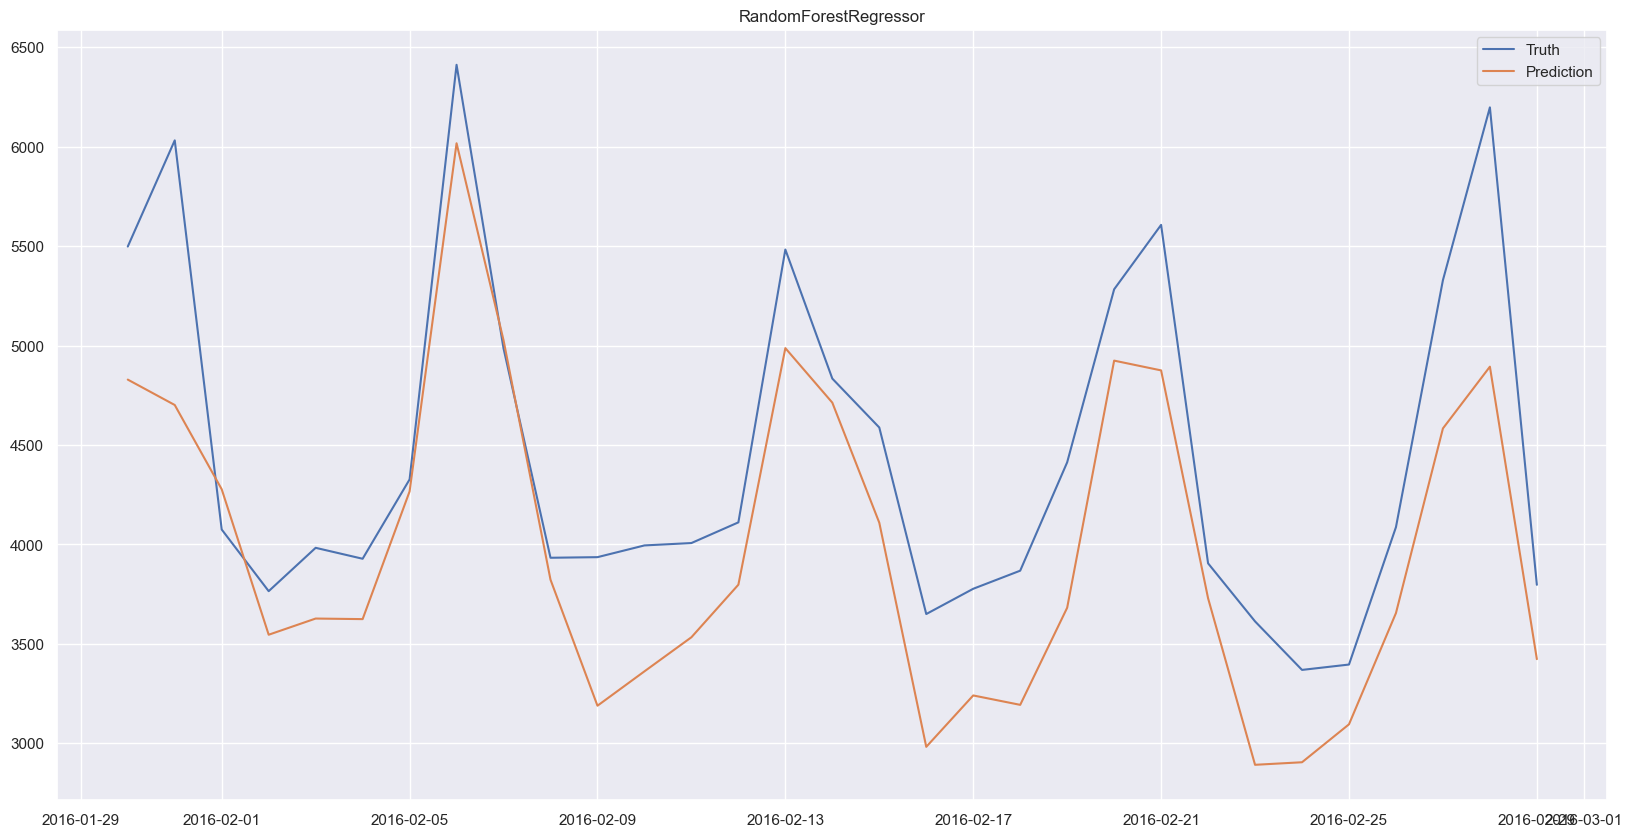

In [323]:
plt.plot(y_test.index, y_test)
plt.plot(y_test.index, preds)
plt.title('RandomForestRegressor')
plt.legend(['Truth','Prediction'])
